In [459]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
import seaborn as sns
#한글 설정
plt.rcParams['figure.figsize']= [30,15]
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['font.size'] = 25
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False) # y축
import pandas as pd
import numpy as np

## 1) 관광지출액

In [340]:
df = pd.read_excel('data/광역지자체 관광지출액_20210422.xlsx')
df

,지역,구분,2019,2020
0,전국,총소비,21032874873062,14351344533244
1,전국,숙박업,596053573558,352801536828
2,전국,여행업,70887490856,6934114671
3,전국,대중교통,788158581791,454928386073
4,전국,렌터카,24975698325,39092400647
...,...,...,...,...
178,제주특별자치도,레저스포츠,28089885019,29122458525
179,제주특별자치도,면세점,177399940643,73449820327
180,제주특별자치도,문화서비스,9207742892,4227393605
181,제주특별자치도,쇼핑(면세점 제외),29910500088,16925928261


In [341]:
set(df['구분'])

{'대중교통',
 '레저스포츠',
 '렌터카',
 '면세점',
 '문화서비스',
 '쇼핑(면세점 제외)',
 '숙박업',
 '식음료',
 '여행업',
 '총소비',
 '카지노',
 '항공사'}

In [342]:
df_melt = df.melt(id_vars=['지역', '구분'], var_name='연도', value_name='지출액')
df_melt

,지역,구분,연도,지출액
0,전국,총소비,2019,21032874873062
1,전국,숙박업,2019,596053573558
2,전국,여행업,2019,70887490856
3,전국,대중교통,2019,788158581791
4,전국,렌터카,2019,24975698325
...,...,...,...,...
361,제주특별자치도,레저스포츠,2020,29122458525
362,제주특별자치도,면세점,2020,73449820327
363,제주특별자치도,문화서비스,2020,4227393605
364,제주특별자치도,쇼핑(면세점 제외),2020,16925928261


Text(0.5, 1.0, '항목별 관광지출액')

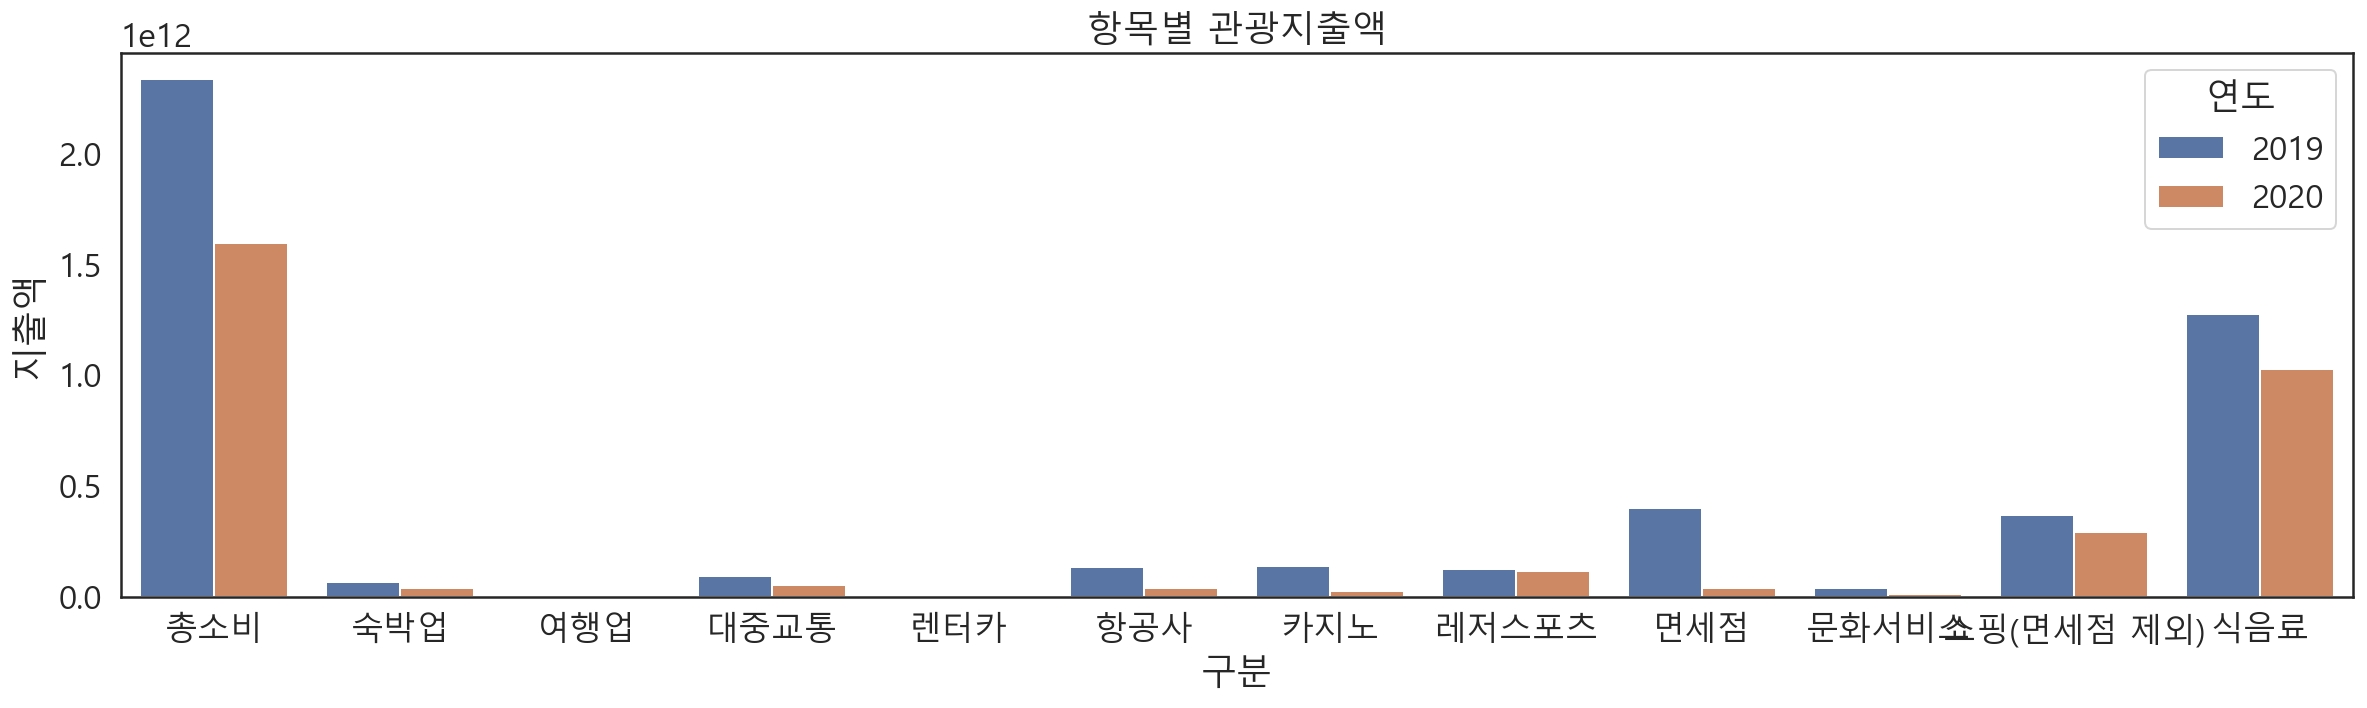

In [389]:
plt.figure(figsize=(20,5))
sns.barplot(x='구분', y='지출액', hue='연도', data=df_melt, ci=None)
plt.title('항목별 관광지출액')

In [344]:
temp = df_melt[(df_melt['지역']!='전국') & (df_melt['구분']!='총소비')]
temp.sort_values(['지출액'], ascending=False, inplace=True)

<ipython-input-344-d9a2fa178e7a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.sort_values(['지출액'], ascending=False, inplace=True)


Text(0.5, 1.0, '항목별 관광지출액')

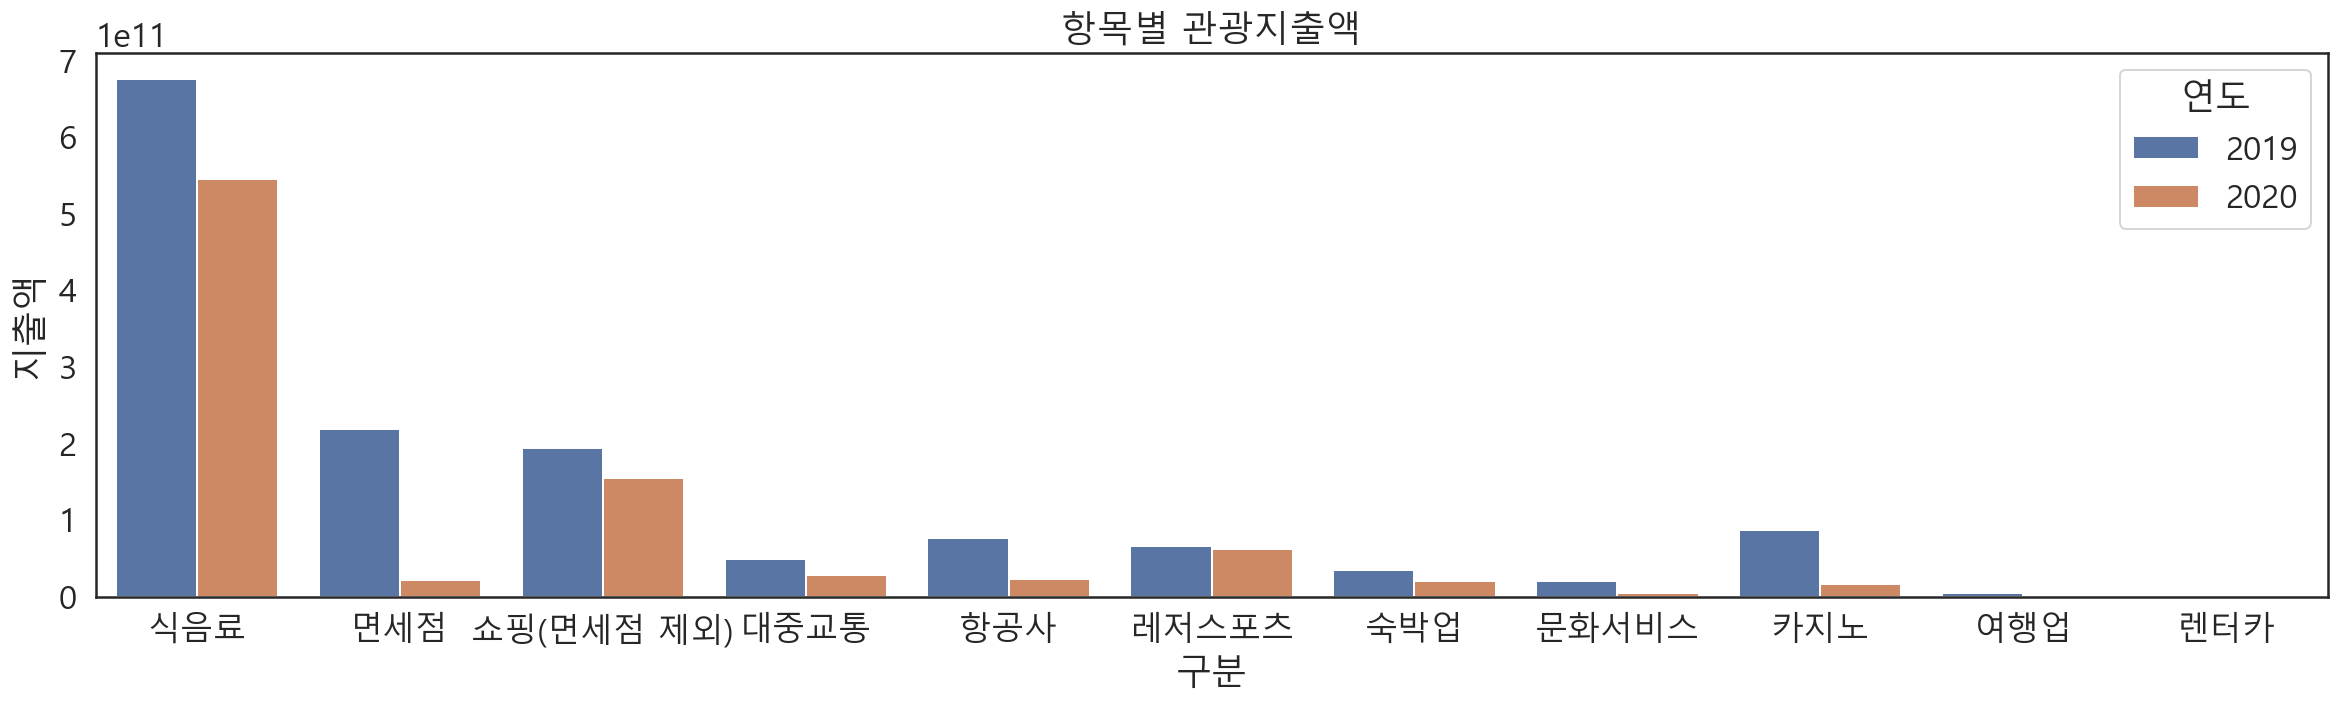

In [390]:
plt.figure(figsize=(20,5))
sns.barplot(x='구분', y='지출액', hue='연도', data=temp, ci=None)
plt.title('항목별 관광지출액')

In [377]:
temp1_2019 = df_melt[(df_melt['지역']=='전국') & (df_melt['구분']!='총소비') & (df_melt['연도']==2019)]
temp1_2020 = df_melt[(df_melt['지역']=='전국') & (df_melt['구분']!='총소비') & (df_melt['연도']==2020)]

In [363]:
temp1_2019

,지역,구분,연도,지출액
1,전국,숙박업,2019,596053573558
2,전국,여행업,2019,70887490856
3,전국,대중교통,2019,788158581791
4,전국,렌터카,2019,24975698325
5,전국,항공사,2019,538132998379
6,전국,카지노,2019,347901225900
7,전국,레저스포츠,2019,1134133521581
8,전국,면세점,2019,2409721470934
9,전국,문화서비스,2019,339063728237
10,전국,쇼핑(면세점 제외),2019,3298889291807


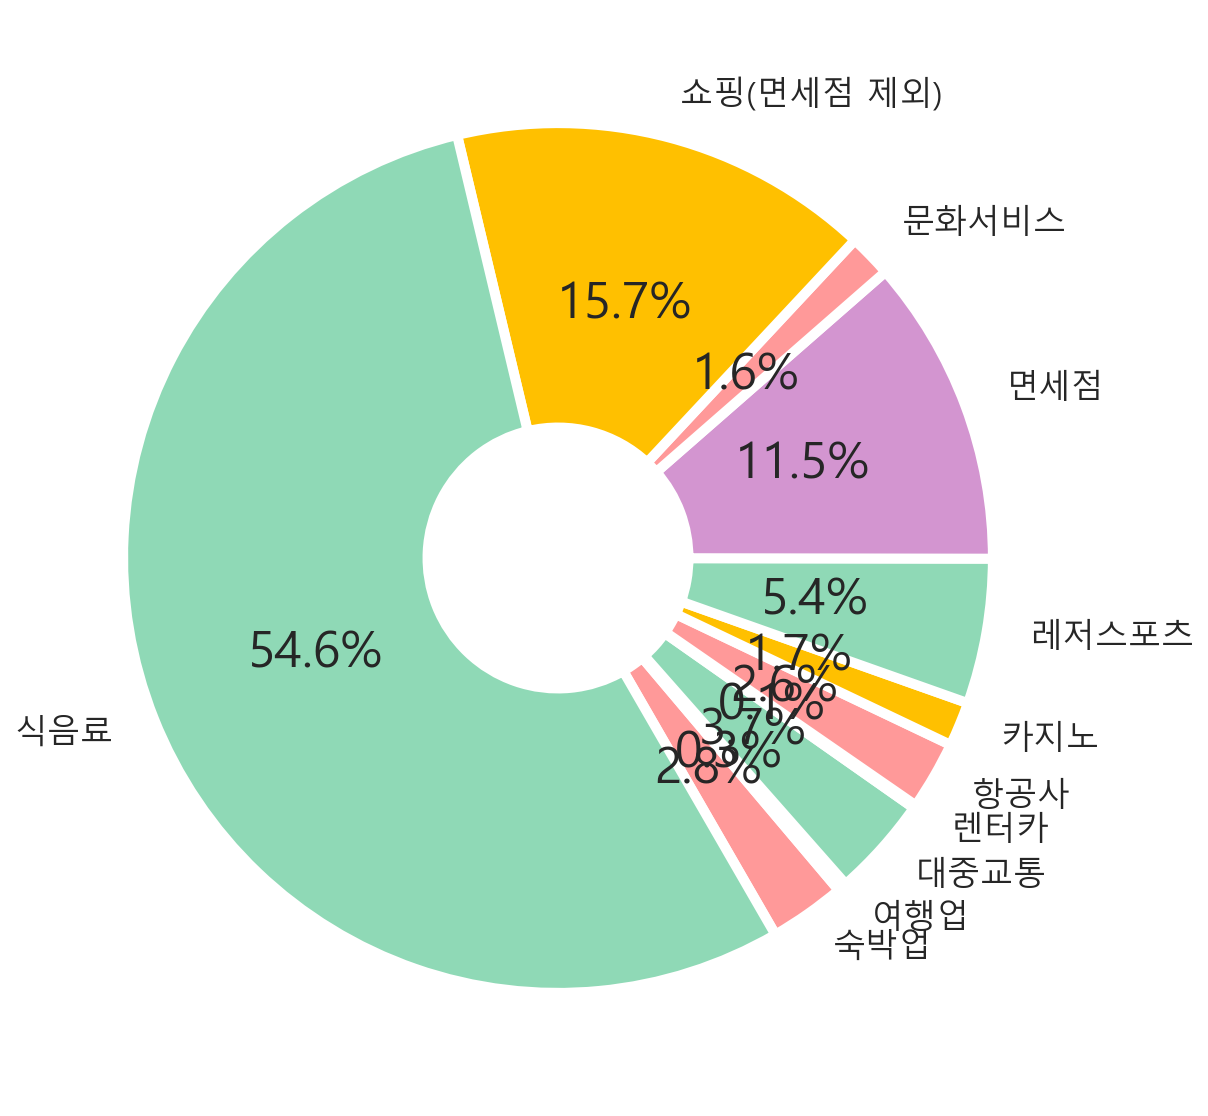

In [461]:
plt.figure(figsize=(20,10))
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(temp1_2019['지출액'], labels=temp1_2019['구분'], autopct='%.1f%%', startangle=300,
       colors=colors, wedgeprops=wedgeprops)
plt.show()

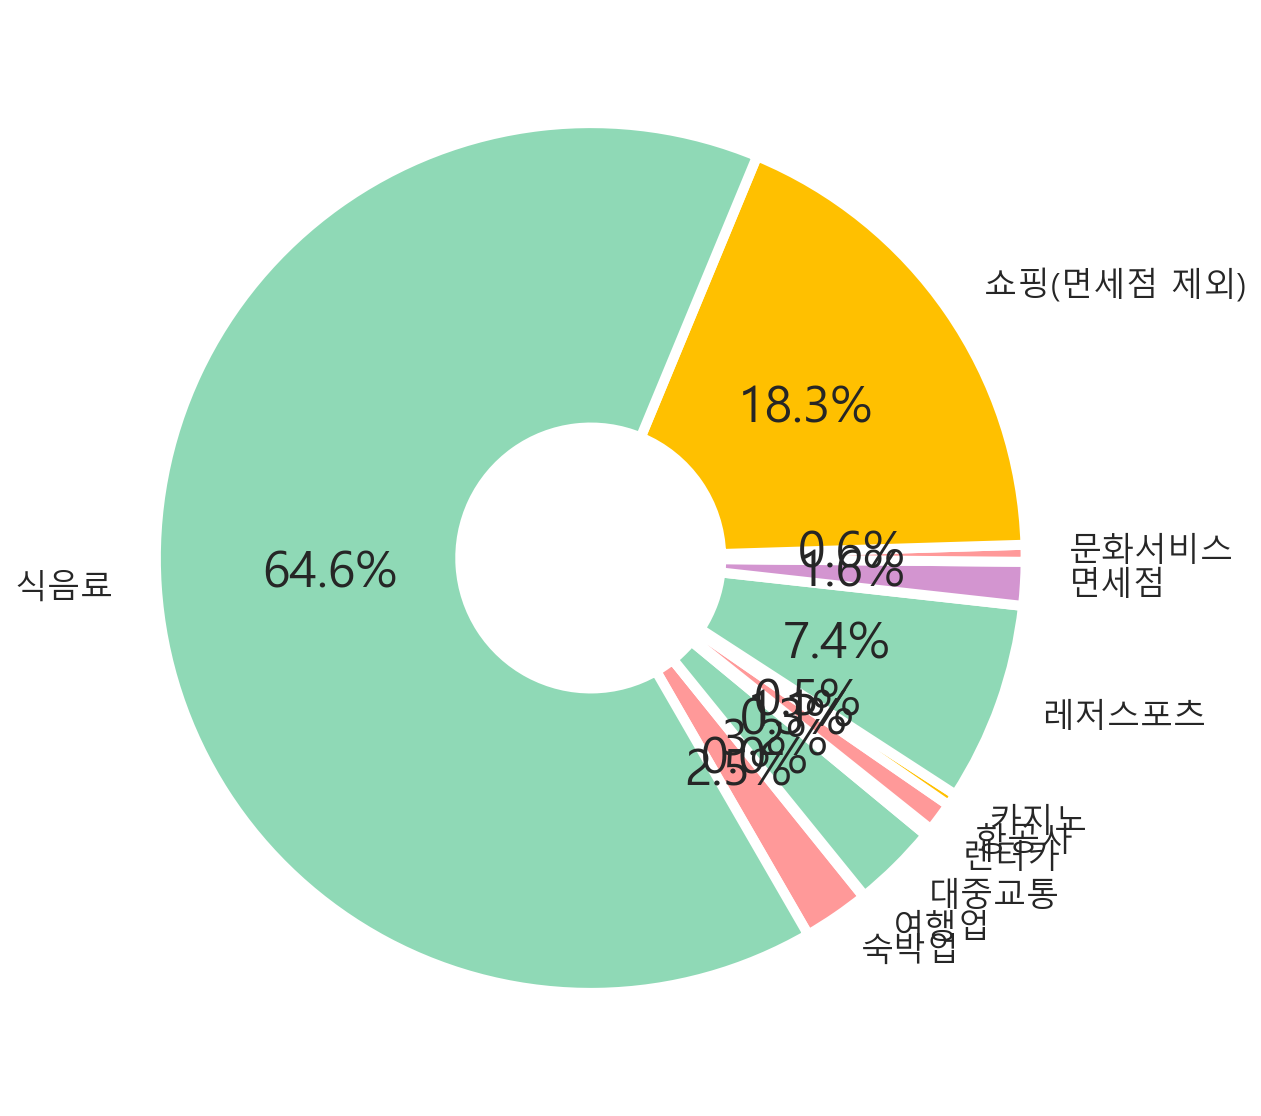

In [460]:
plt.figure(figsize=(20,10))
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(temp1_2020['지출액'], labels=temp1_2020['구분'], autopct='%.1f%%', startangle=300,
       colors=colors, wedgeprops=wedgeprops)
plt.show()

Text(0.5, 1.0, '항목별 관광지출액')

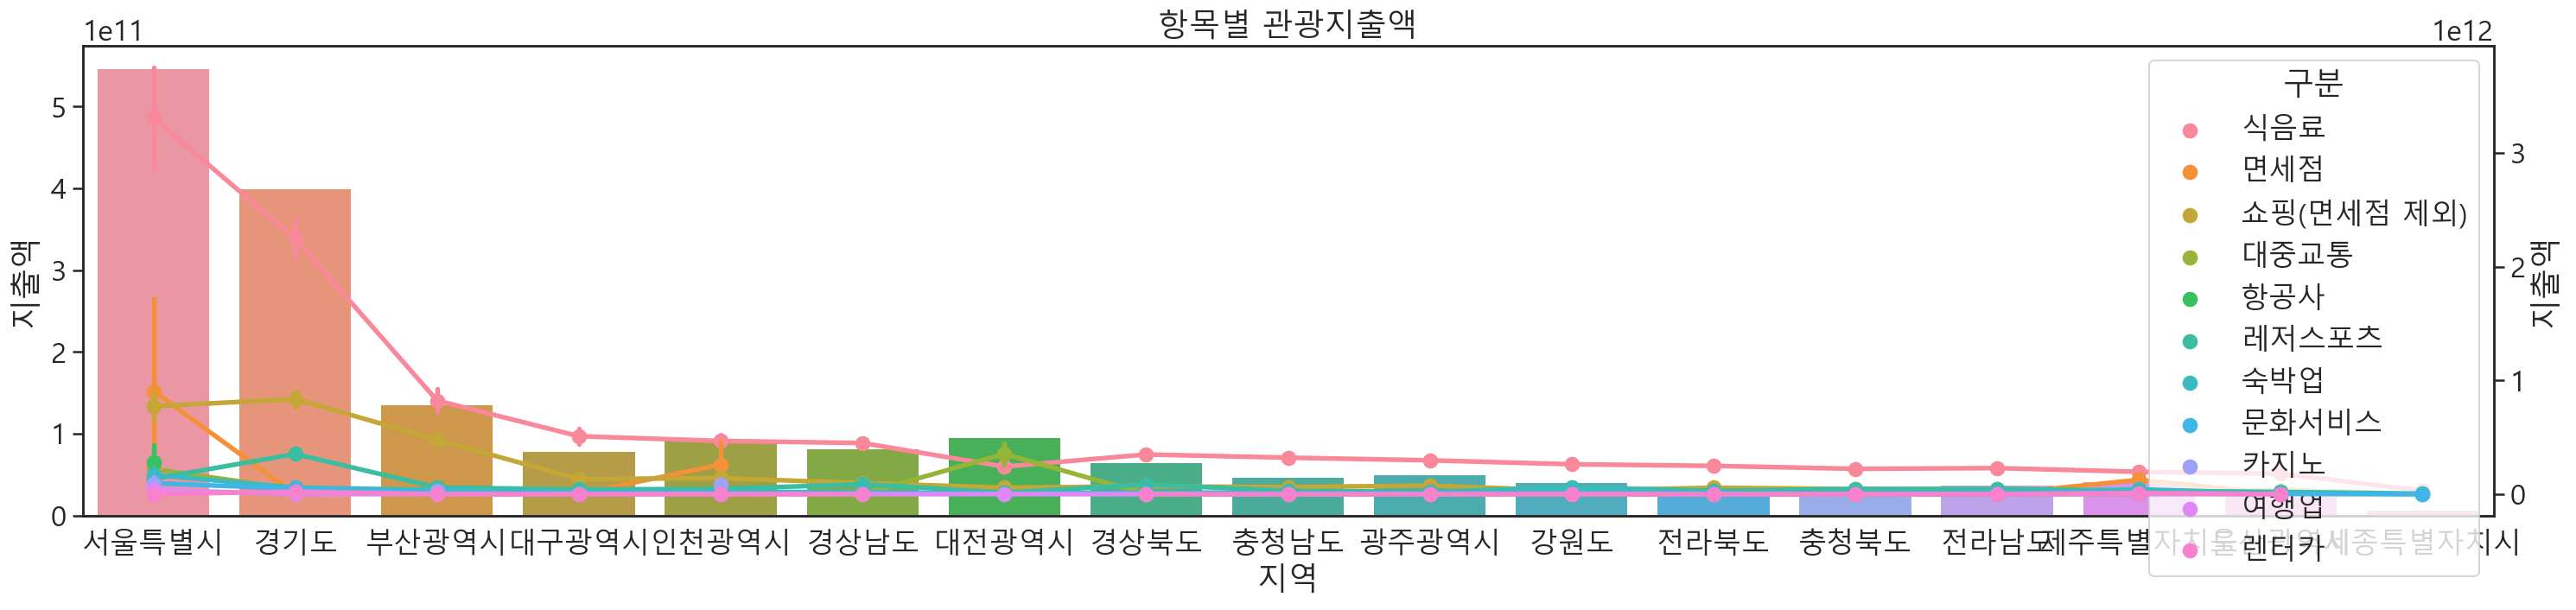

In [401]:
fig, ax1 = plt.subplots(figsize=(25,5))
ax2 = ax1.twinx()
ax1 = sns.barplot(x='지역', y='지출액', data=temp, ci=None, ax=ax1)
ax2 = sns.pointplot(x='지역', y='지출액', hue='구분', data=temp, ax=ax2)
plt.title('항목별 관광지출액')

Text(0.5, 1.0, '항목별 관광지출액')

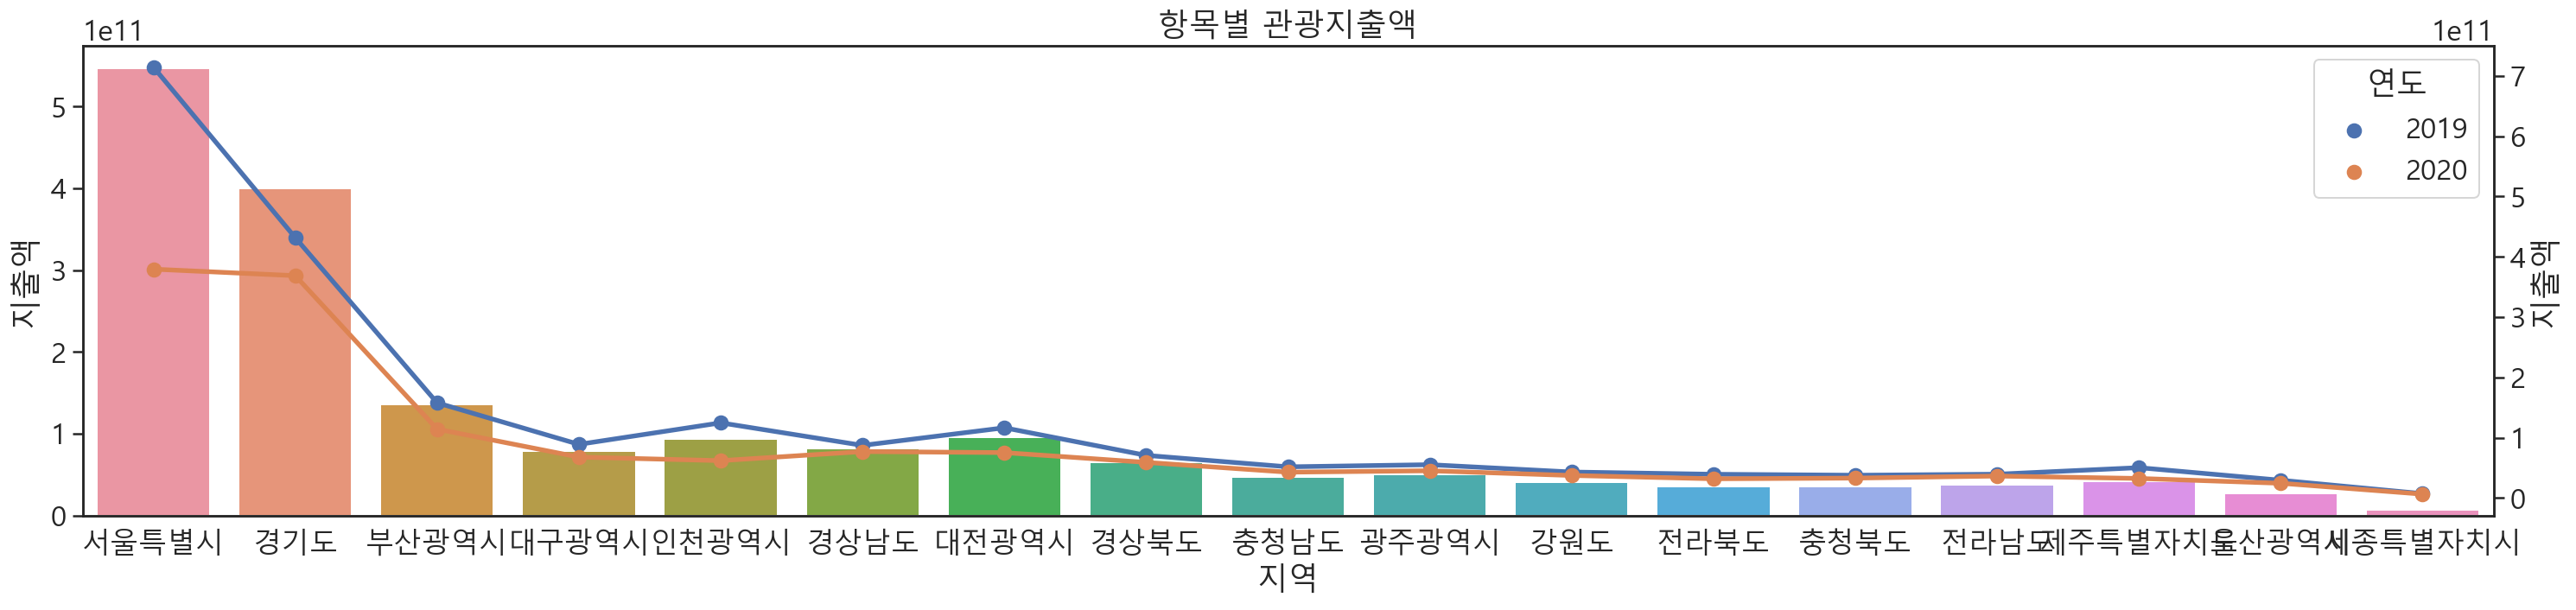

In [400]:
fig, ax1 = plt.subplots(figsize=(25,5))
ax2 = ax1.twinx()
ax1 = sns.barplot(x='지역', y='지출액', data=temp, ci=None, ax=ax1)
ax2 = sns.pointplot(x='지역', y='지출액', hue='연도', data=temp, ax=ax2, ci=None)
plt.title('항목별 관광지출액')

In [143]:
df_melt

,지역,구분,연도,지출액
0,전국,총소비,2019,21032874873062
1,전국,숙박업,2019,596053573558
2,전국,여행업,2019,70887490856
3,전국,대중교통,2019,788158581791
4,전국,렌터카,2019,24975698325
...,...,...,...,...
361,제주특별자치도,레저스포츠,2020,29122458525
362,제주특별자치도,면세점,2020,73449820327
363,제주특별자치도,문화서비스,2020,4227393605
364,제주특별자치도,쇼핑(면세점 제외),2020,16925928261


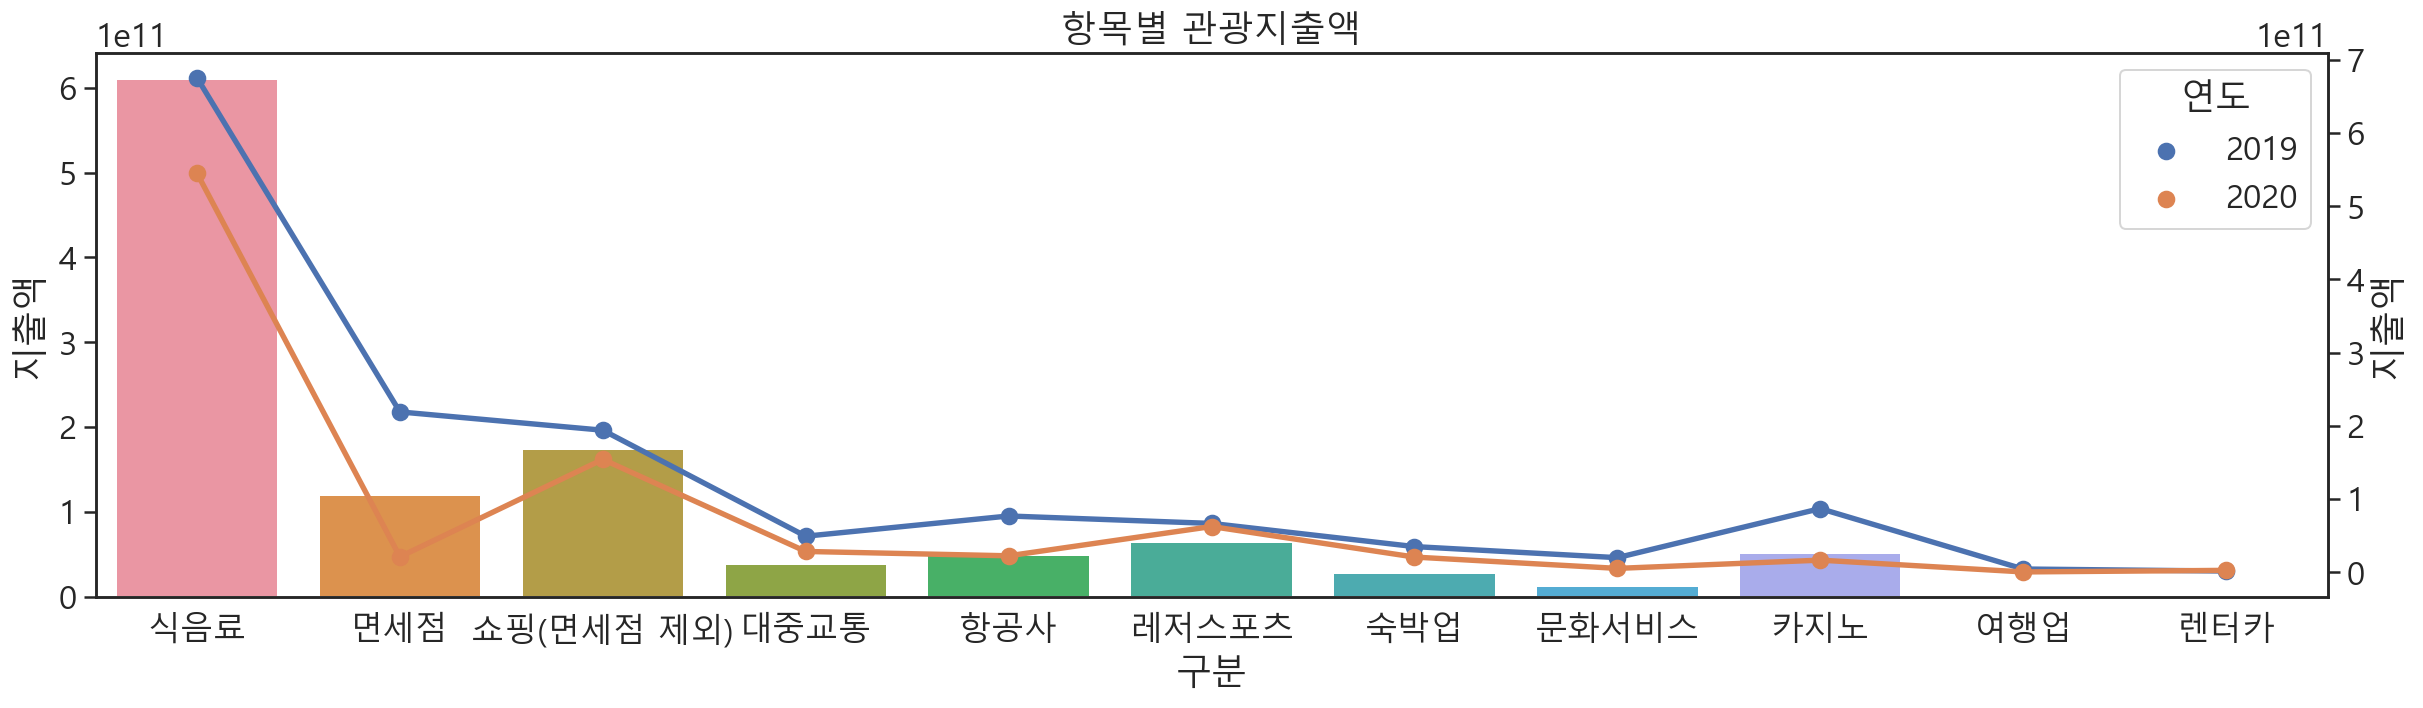

In [402]:
fig, ax1 = plt.subplots(figsize=(20,5))
ax2 = ax1.twinx()
ax1 = sns.barplot(x='구분', y='지출액', data=temp, ci=None, ax=ax1)
ax2 = sns.pointplot(x='구분', y='지출액', hue='연도', data=temp, ax=ax2, ci=None)
plt.title('항목별 관광지출액')
plt.savefig('data2/항목별_지출액.jpg')

## 2) 방문자수

In [407]:
df = pd.read_csv('data/광역지자체 방문자수_20210422.csv', encoding='cp949')
df

,지역,구분,19.01,19.02,19.03,19.04,19.05,19.06,19.07,19.08,...,20.06,20.07,20.08,20.09,20.1,20.11,20.12,21.01,21.02,21.03
0,전국,현지인(a),"681,997,610","592,580,236","701,908,000","640,311,882","677,198,134","649,221,612","655,834,067","653,247,220",...,"702,599,016","720,548,528","689,060,750","691,186,584","712,432,462","703,466,106","666,973,408","654,075,698","622,599,131","737,136,470"
1,전국,외지인(b),"216,038,820","220,373,580","271,202,676","207,230,460","239,603,808","229,760,916","262,371,242","293,042,802",...,"202,162,544","224,372,743","223,302,482","197,179,504","235,232,880","203,589,538","175,957,754","170,470,996","190,434,912","223,568,768"
2,전국,외국인(c),"4,755,719","4,793,419","5,274,725","6,145,658","5,538,558","5,148,186","5,857,943","6,371,252",...,"738,437","872,610","829,012","922,867","851,024","820,880","903,362","633,017","582,854","725,027"
3,전국,외부방문자(b+c),"220,794,539","225,166,999","276,477,401","213,376,119","245,142,367","234,909,102","268,229,185","299,414,055",...,"202,900,981","225,245,353","224,131,493","198,102,370","236,083,904","204,410,418","176,861,116","171,104,014","191,017,766","224,293,796"
4,전국,전년외부방문자(b'+c'),"209,401,899","208,252,992","248,720,478","211,823,035","239,308,793","219,622,375","244,939,880","251,357,076",...,"234,909,102","268,229,185","299,414,055","275,924,403","260,164,004","259,788,197","240,425,636","247,744,460","180,643,522","177,740,375"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,제주특별자치도,외지인(b),"4,266,230","3,919,934","4,446,690","4,080,300","4,266,714","4,080,814","4,713,832","5,349,022",...,"3,630,736","4,600,592","5,108,012","3,522,309","4,560,640","4,443,582","3,518,081","3,090,038","3,866,670","4,788,962"
104,제주특별자치도,외국인(c),"312,594","355,574","406,773","495,204","472,709","505,781","524,778","615,201",...,"39,857","36,767","38,042","48,657","50,396","41,154","38,685","32,218","26,223","35,769"
105,제주특별자치도,외부방문자(b+c),"4,578,825","4,275,507","4,853,464","4,575,504","4,739,423","4,586,595","5,238,610","5,964,223",...,"3,670,593","4,637,360","5,146,054","3,570,966","4,611,036","4,484,736","3,556,766","3,122,256","3,892,893","4,824,731"
106,제주특별자치도,전년외부방문자(b'+c'),"4,434,512","3,640,700","4,402,679","4,669,075","4,700,279","4,651,075","5,106,289","5,612,069",...,"4,586,595","5,238,610","5,964,223","4,731,762","5,363,107","4,873,559","5,036,116","5,044,149","3,208,556","2,968,015"


In [408]:
df1 = df[df['구분'].isin(['현지인(a)', '외지인(b)', '외국인(c)'])]
df1_melt = df1.melt(id_vars=['지역', '구분'], var_name='연월', value_name='방문자수')
df1_melt['방문자수'] = df1_melt['방문자수'].apply(lambda x:x.replace(',',''))
df1_melt['방문자수'] = pd.to_numeric(df1_melt['방문자수'])
df1_melt

,지역,구분,연월,방문자수
0,전국,현지인(a),19.01,681997610
1,전국,외지인(b),19.01,216038820
2,전국,외국인(c),19.01,4755719
3,서울특별시,현지인(a),19.01,130981176
4,서울특별시,외지인(b),19.01,49167240
...,...,...,...,...
1453,경상남도,외지인(b),21.03,12046972
1454,경상남도,외국인(c),21.03,41236
1455,제주특별자치도,현지인(a),21.03,16332334
1456,제주특별자치도,외지인(b),21.03,4788962


In [409]:
df2 = df[df['구분']=='외부방문자 전년대비증감률(%)']
df2_melt = df2.melt(id_vars=['지역', '구분'], var_name='연월', value_name='증감률(%)')
df2_melt['증감률(%)'] = pd.to_numeric(df2_melt['증감률(%)'])
df2_melt

,지역,구분,연월,증감률(%)
0,전국,외부방문자 전년대비증감률(%),19.01,5
1,서울특별시,외부방문자 전년대비증감률(%),19.01,6
2,부산광역시,외부방문자 전년대비증감률(%),19.01,0
3,대구광역시,외부방문자 전년대비증감률(%),19.01,1
4,인천광역시,외부방문자 전년대비증감률(%),19.01,15
...,...,...,...,...
481,전라북도,외부방문자 전년대비증감률(%),21.03,20
482,전라남도,외부방문자 전년대비증감률(%),21.03,17
483,경상북도,외부방문자 전년대비증감률(%),21.03,51
484,경상남도,외부방문자 전년대비증감률(%),21.03,21


In [410]:
temp2 = df2_melt[(df2_melt['지역']!='전국')]
temp2['연도'] = temp2['연월'].apply(lambda x:x[:2])
temp2

<ipython-input-410-ad47f51f62bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp2['연도'] = temp2['연월'].apply(lambda x:x[:2])


,지역,구분,연월,증감률(%),연도
1,서울특별시,외부방문자 전년대비증감률(%),19.01,6,19
2,부산광역시,외부방문자 전년대비증감률(%),19.01,0,19
3,대구광역시,외부방문자 전년대비증감률(%),19.01,1,19
4,인천광역시,외부방문자 전년대비증감률(%),19.01,15,19
5,광주광역시,외부방문자 전년대비증감률(%),19.01,1,19
...,...,...,...,...,...
481,전라북도,외부방문자 전년대비증감률(%),21.03,20,21
482,전라남도,외부방문자 전년대비증감률(%),21.03,17,21
483,경상북도,외부방문자 전년대비증감률(%),21.03,51,21
484,경상남도,외부방문자 전년대비증감률(%),21.03,21,21


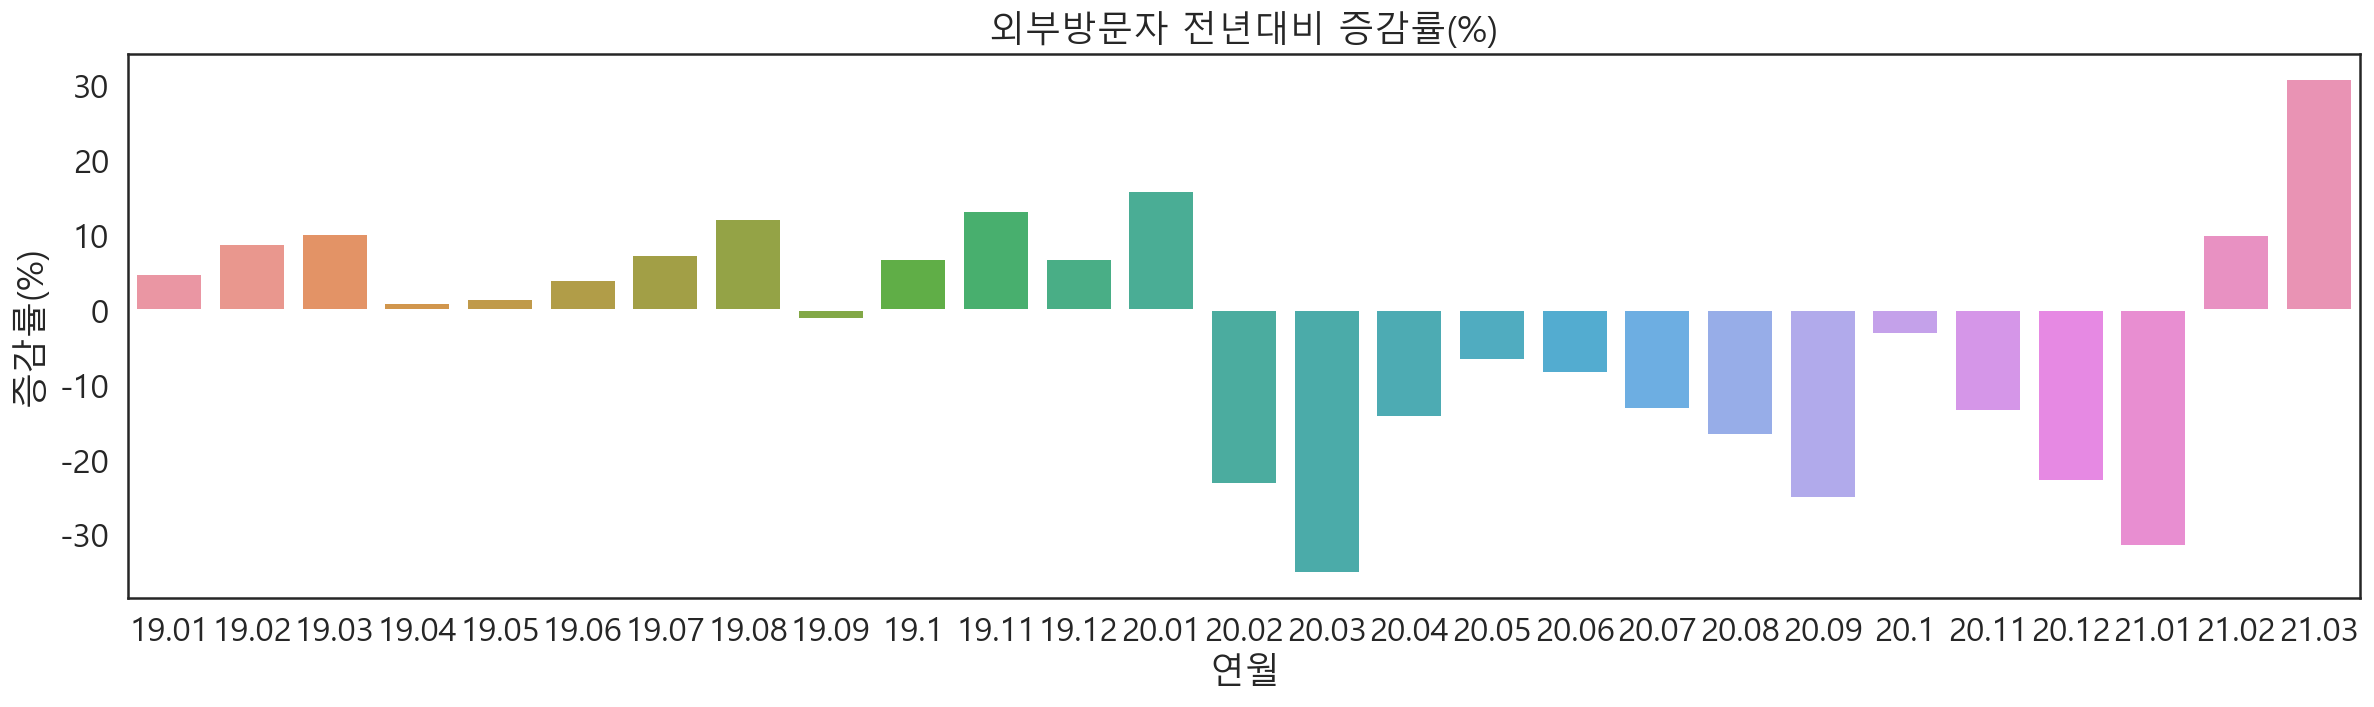

In [411]:
plt.figure(figsize=(20,5))
sns.barplot(data=temp2, x='연월', y='증감률(%)', ci=None)
plt.title('외부방문자 전년대비 증감률(%)')
plt.savefig('data2/방문자수_증감률.jpg')

In [412]:
temp = df1_melt[(df1_melt['지역']!='전국')]
temp['연도'] = temp['연월'].apply(lambda x:x[:2])
temp
#temp.sort_values(['지출액'], ascending=False, inplace=True)

<ipython-input-412-0dc7885a4b4d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['연도'] = temp['연월'].apply(lambda x:x[:2])


,지역,구분,연월,방문자수,연도
3,서울특별시,현지인(a),19.01,130981176,19
4,서울특별시,외지인(b),19.01,49167240,19
5,서울특별시,외국인(c),19.01,1881982,19
6,부산광역시,현지인(a),19.01,38855148,19
7,부산광역시,외지인(b),19.01,11674128,19
...,...,...,...,...,...
1453,경상남도,외지인(b),21.03,12046972,21
1454,경상남도,외국인(c),21.03,41236,21
1455,제주특별자치도,현지인(a),21.03,16332334,21
1456,제주특별자치도,외지인(b),21.03,4788962,21


Text(0.5, 1.0, '지역별 방문자수')

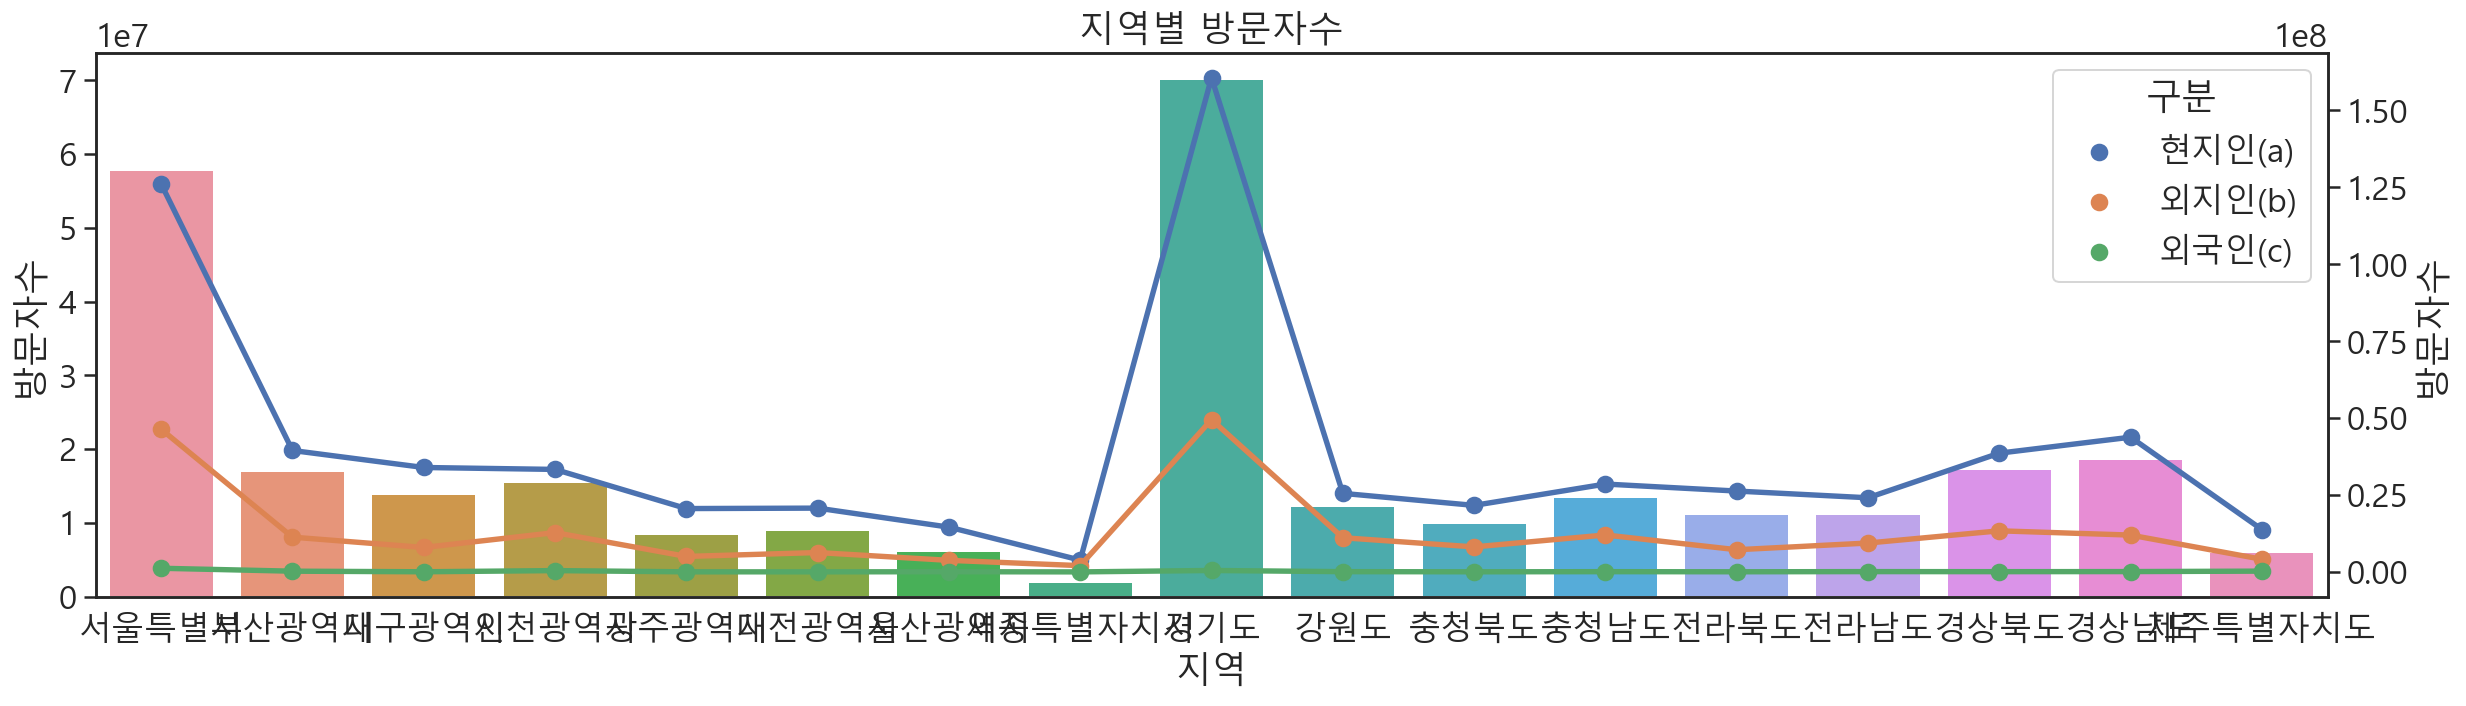

In [413]:
# plt.figure(figsize=(20,5))
# sns.barplot(x='지역', y='방문자수', hue='연도', data=temp, ci=None)
# plt.title('지역별 방문자수')

fig, ax1 = plt.subplots(figsize=(20,5))
ax2 = ax1.twinx()
ax1 = sns.barplot(x='지역', y='방문자수', data=temp, ci=None, ax=ax1)
ax2 = sns.pointplot(x='지역', y='방문자수', data=temp, hue='구분', ax=ax2, ci=None)
plt.title('지역별 방문자수')

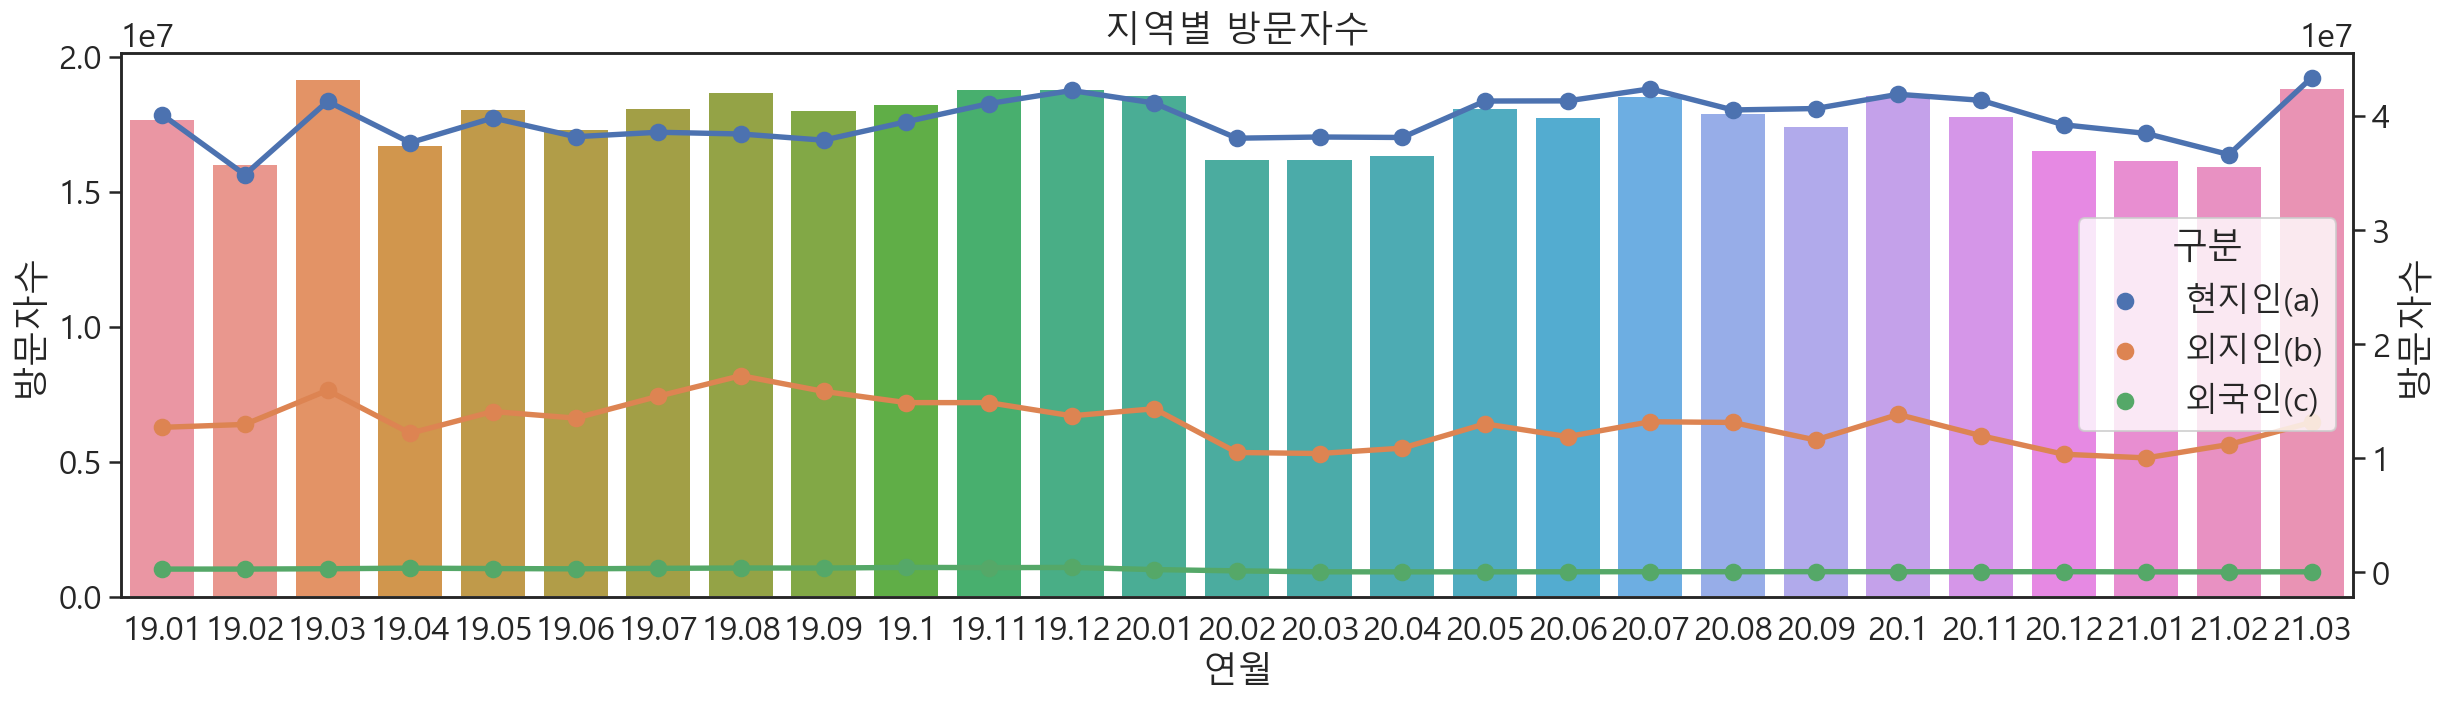

In [414]:
fig, ax1 = plt.subplots(figsize=(20,5))
ax2 = ax1.twinx()
ax1 = sns.barplot(x='연월', y='방문자수', data=temp, ci=None, ax=ax1)
ax2 = sns.pointplot(x='연월', y='방문자수', hue='구분', data=temp, ax=ax2, ci=None)
plt.title('지역별 방문자수')
plt.savefig('data2/지역별_방문자수_상세.jpg')

<AxesSubplot:xlabel='연월', ylabel='방문자수'>

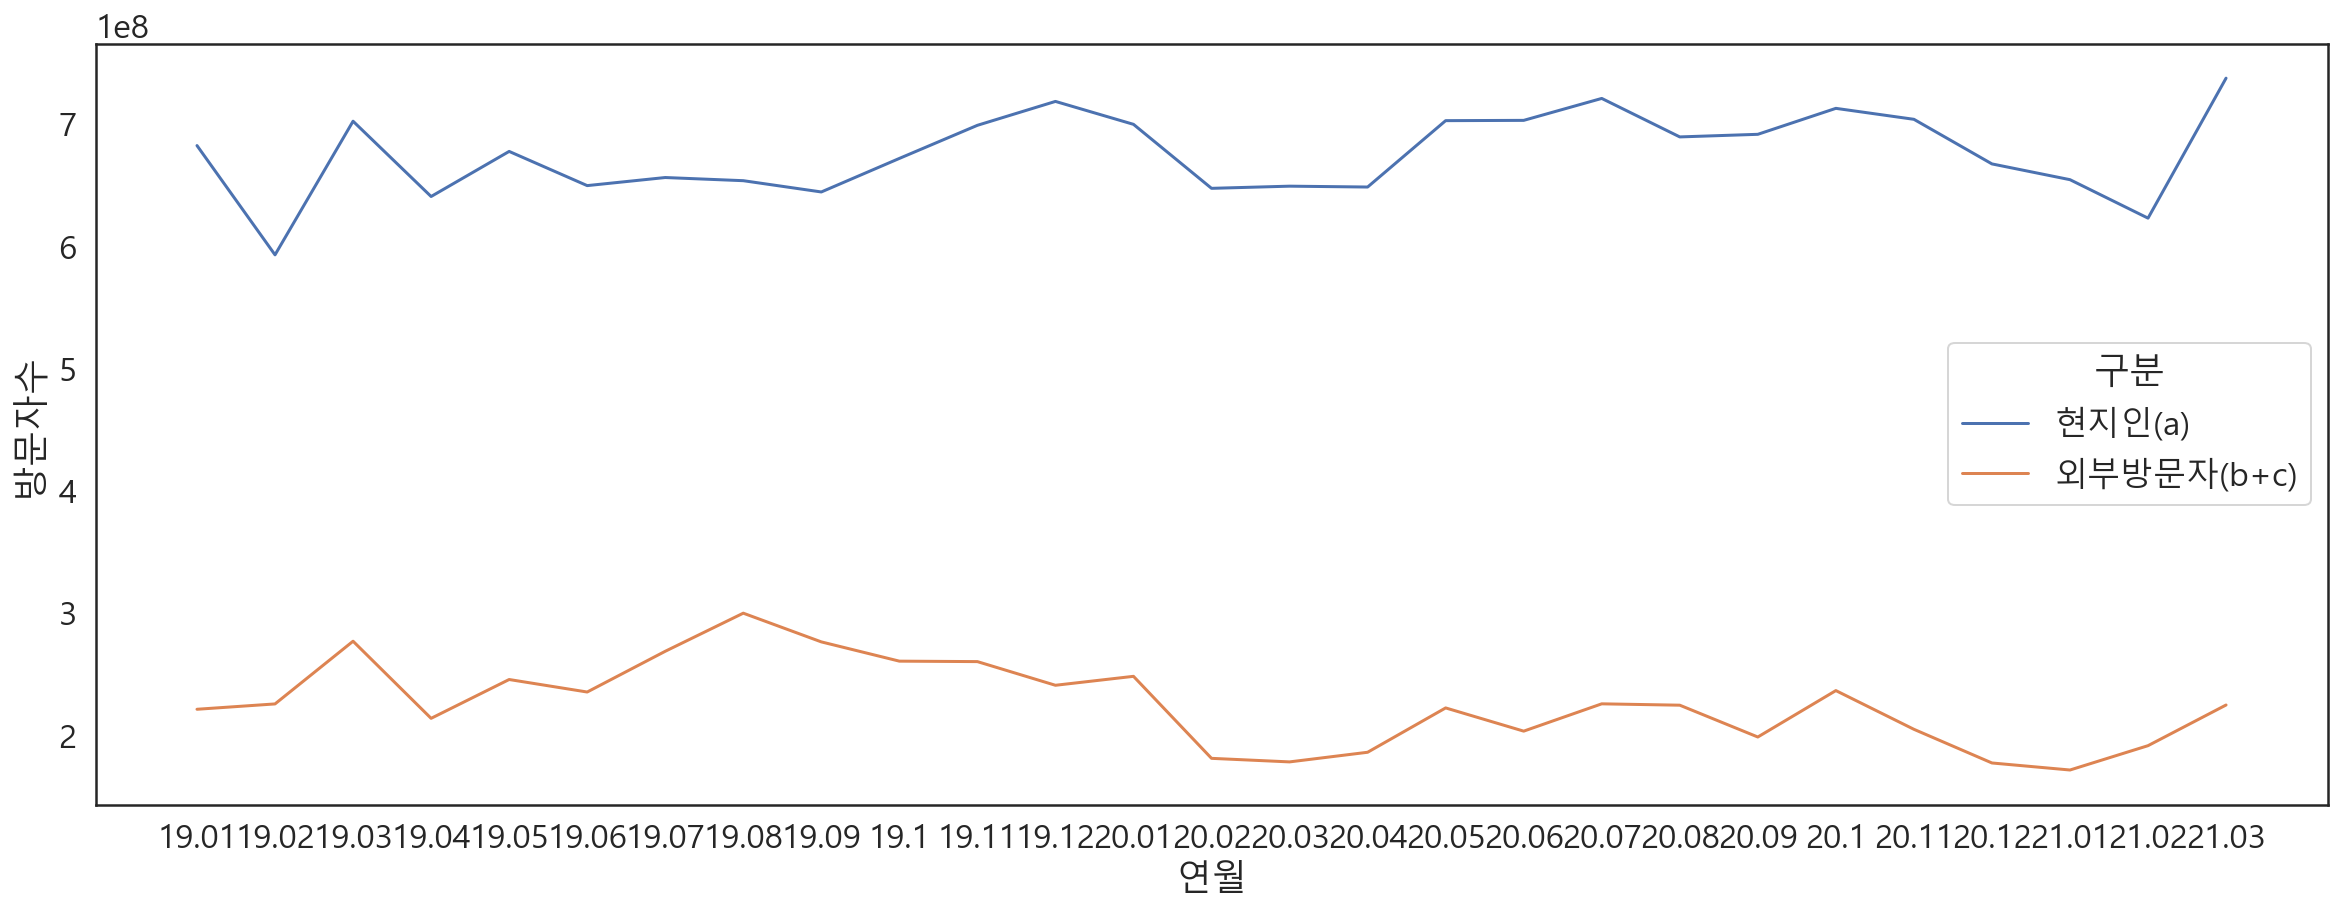

In [416]:
plt.figure(figsize=(20,7))
sns.lineplot(x='연월', y='방문자수', data=temp_total, ci=None, hue='구분')

In [417]:
temp_total = df1_melt[df1_melt['지역']=='전국']

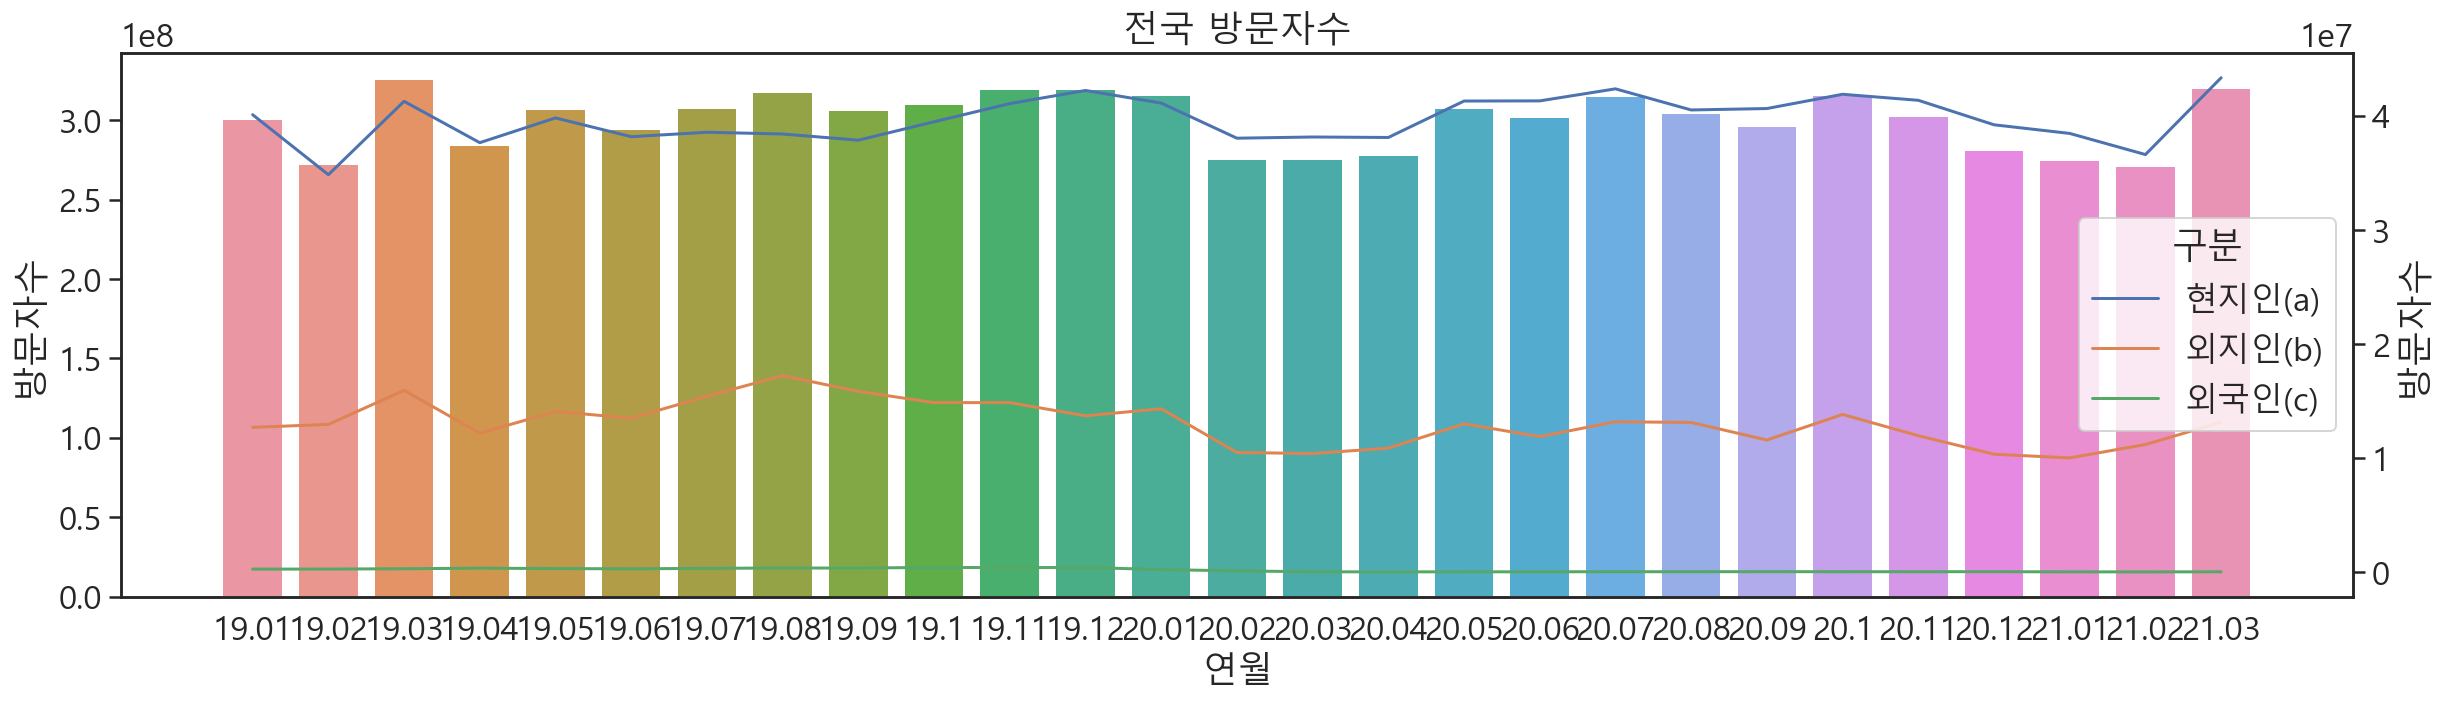

In [418]:
fig, ax1 = plt.subplots(figsize=(20,5))
ax2 = ax1.twinx()
ax1 = sns.barplot(x='연월', y='방문자수', data=temp_total, ci=None, ax=ax1)
ax2 = sns.lineplot(x='연월', y='방문자수', hue='구분', data=temp, ci=None, ax=ax2)
plt.title('전국 방문자수')
plt.savefig('data2/전국방문자수.jpg')

Text(0.5, 1.0, '지역별 방문자수')

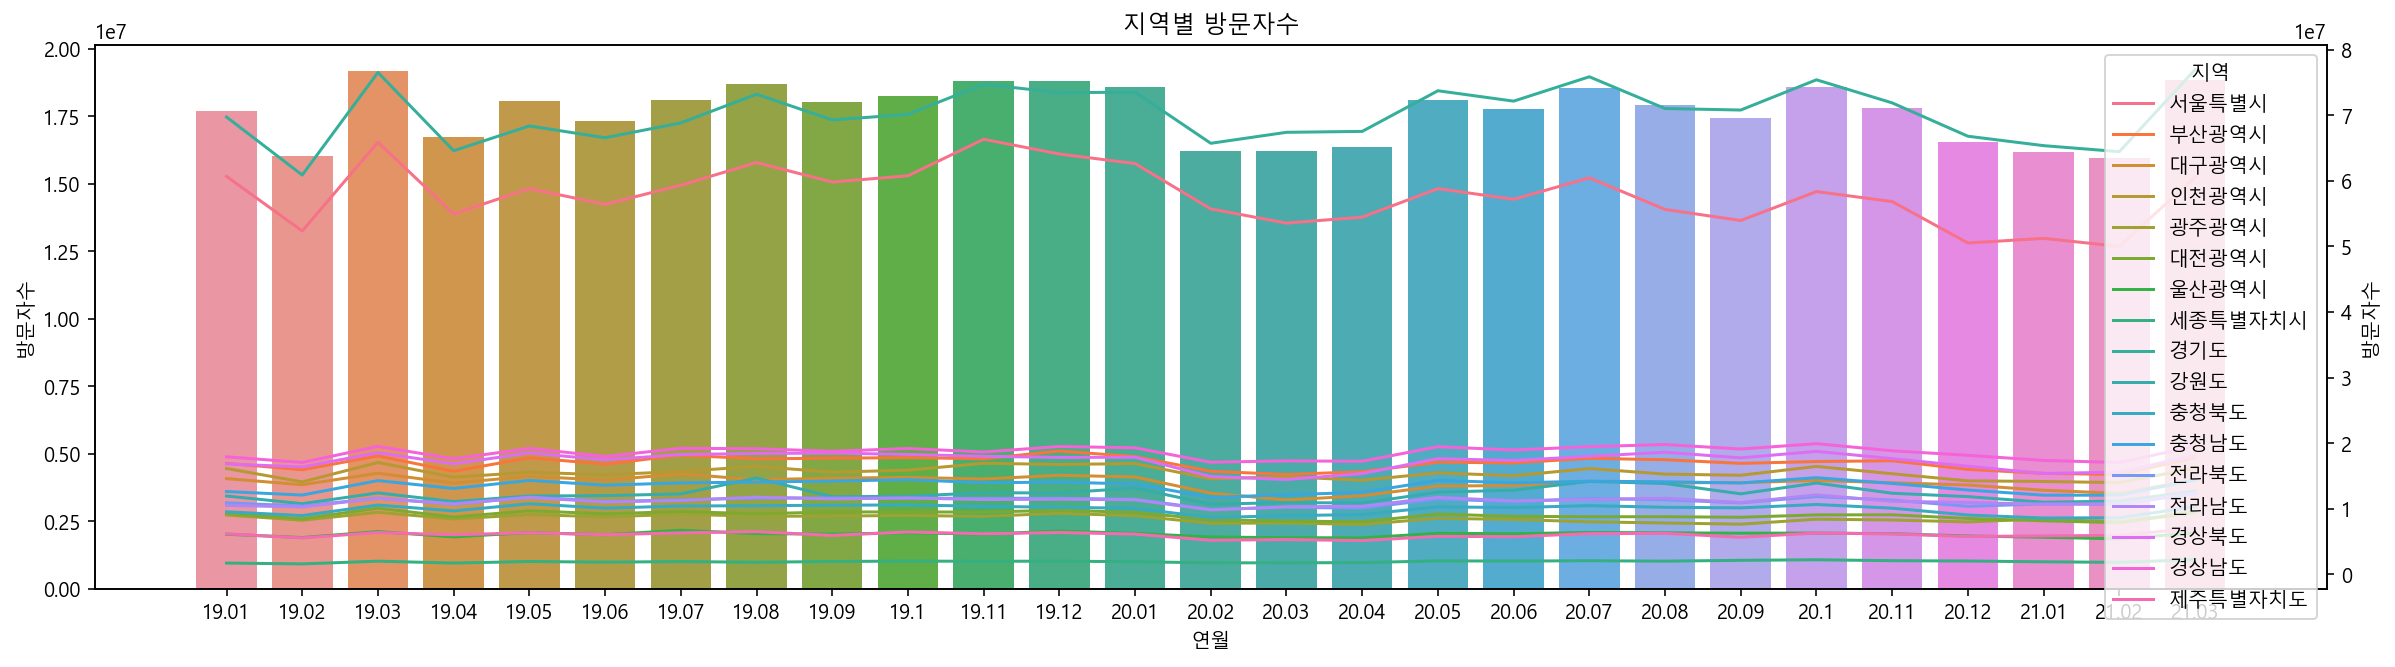

In [112]:
fig, ax1 = plt.subplots(figsize=(20,5))
ax2 = ax1.twinx()
ax1 = sns.barplot(x='연월', y='방문자수', data=temp, ci=None, ax=ax1)
ax2 = sns.lineplot(x='연월', y='방문자수', hue='지역', data=temp, ci=None, ax=ax2)
plt.title('지역별 방문자수')

In [420]:
temp1 = temp.groupby(['지역', '연도']).sum()
temp1.reset_index(inplace=True)

In [421]:
temp1

,지역,연도,방문자수
0,강원도,19,437633071
1,강원도,20,448858372
2,강원도,21,104695653
3,경기도,19,2508805588
4,경기도,20,2555424797
5,경기도,21,620241774
6,경상남도,19,671676615
7,경상남도,20,674261753
8,경상남도,21,161960700
9,경상북도,19,642048576


<AxesSubplot:xlabel='지역', ylabel='방문자수'>

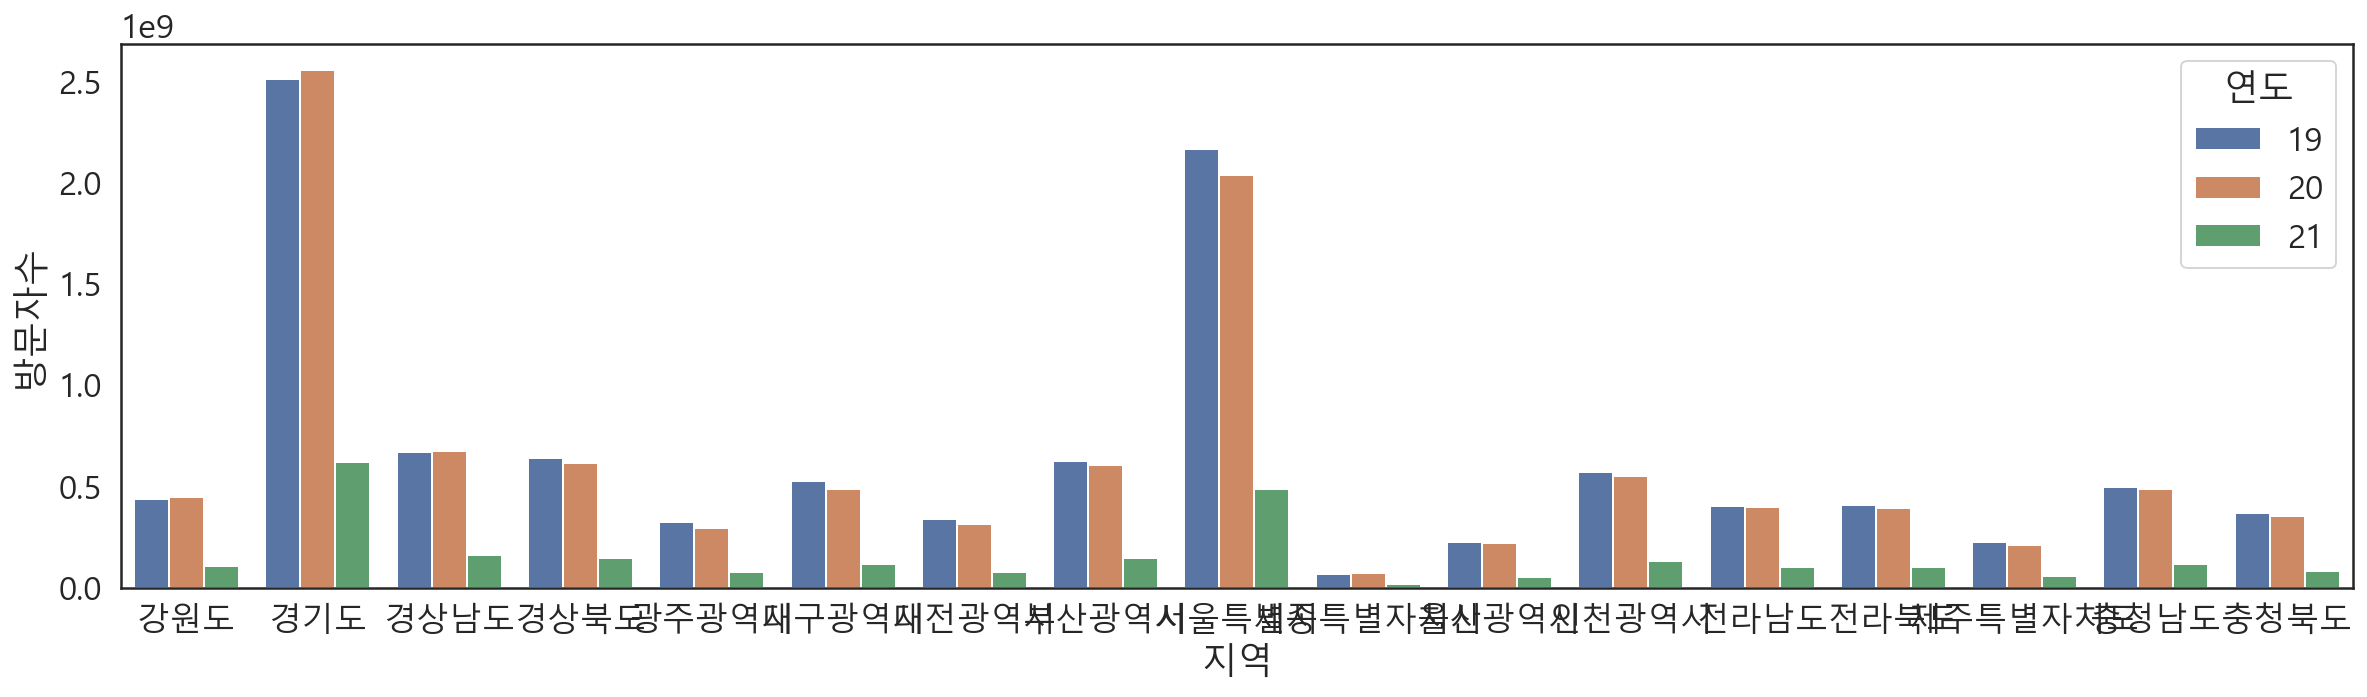

In [422]:
plt.figure(figsize=(20,5))
sns.barplot(data=temp1, x='지역', y='방문자수', hue='연도')

In [423]:
a=[3,5,7]
temp1.iloc[a, :]

,지역,연도,방문자수
3,경기도,19,2508805588
5,경기도,21,620241774
7,경상남도,20,674261753


In [424]:
idx=[]
for n in range(0, len(temp1)//3):
    if (temp1.iloc[(3*n+1), 2] - temp1.iloc[(3*n), 2]) > 0:
        idx.append(3*n+1)
        idx.append(3*n)

In [425]:
temp1.iloc[idx, :]

,지역,연도,방문자수
1,강원도,20,448858372
0,강원도,19,437633071
4,경기도,20,2555424797
3,경기도,19,2508805588
7,경상남도,20,674261753
6,경상남도,19,671676615
28,세종특별자치시,20,72167631
27,세종특별자치시,19,68459985


In [426]:
temp2 = temp.groupby(['지역', '연도']).mean()
temp2.reset_index(inplace=True)

<AxesSubplot:xlabel='지역', ylabel='방문자수'>

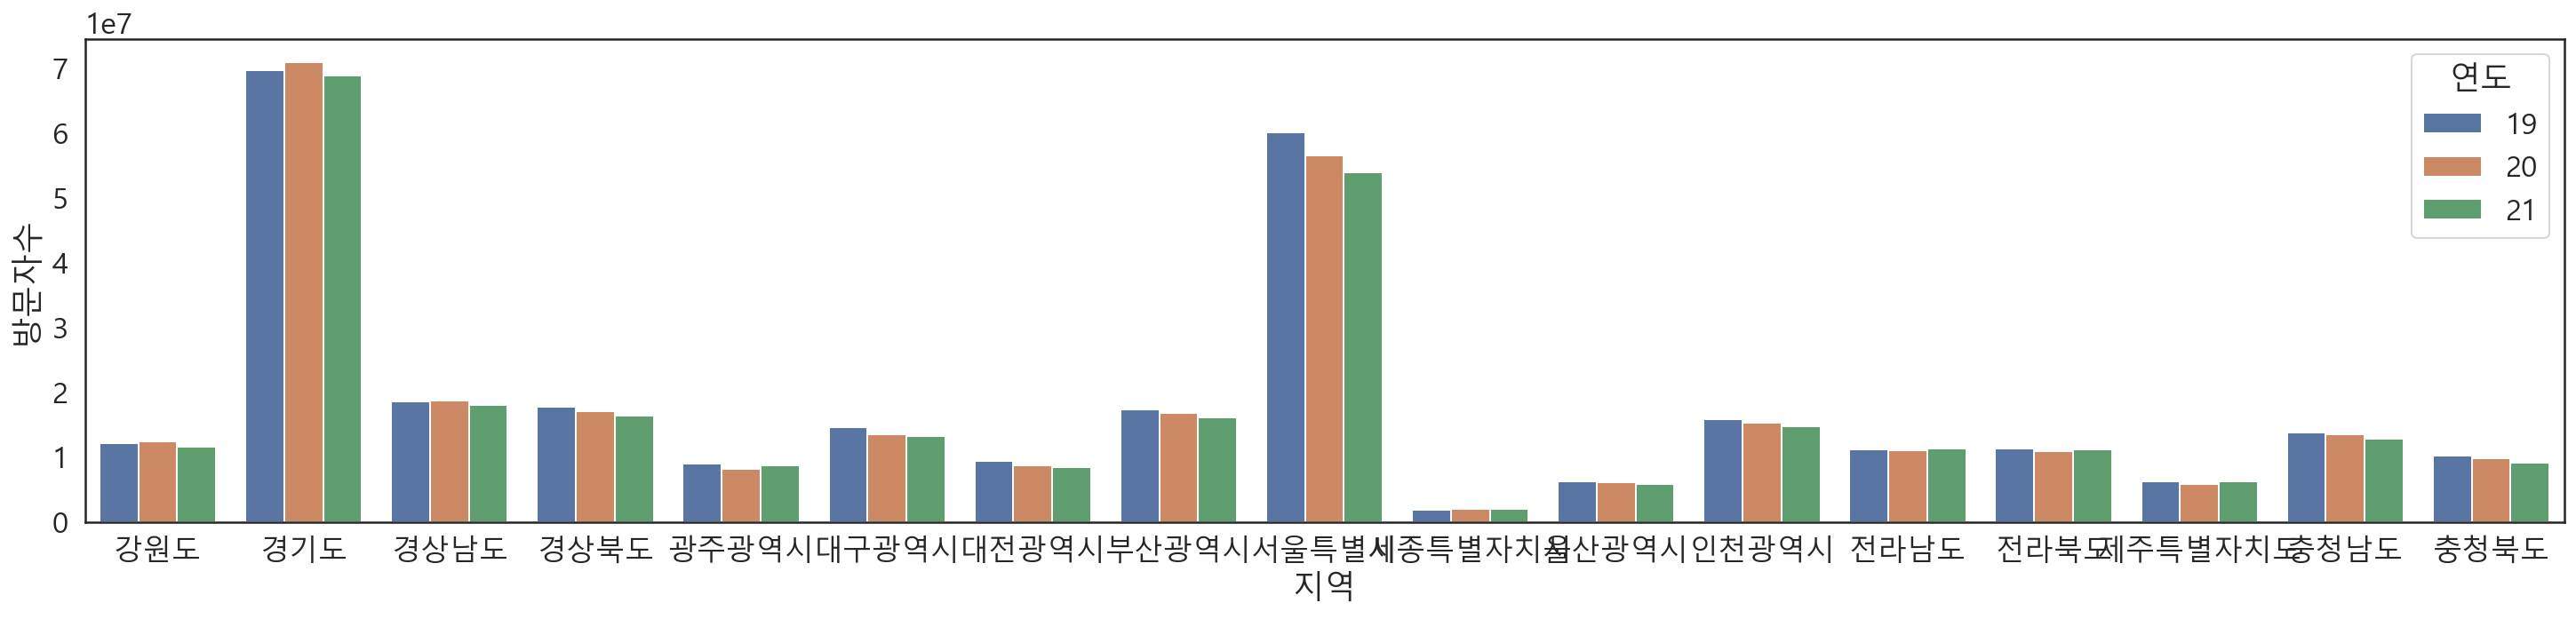

In [429]:
plt.figure(figsize=(25,5))
sns.barplot(data=temp2, x='지역', y='방문자수', hue='연도')

In [430]:
df1 = df[df['구분'].isin(['외부방문자(b+c)'])]
df1_melt = df1.melt(id_vars=['지역', '구분'], var_name='연월', value_name='방문자수')
df1_melt['방문자수'] = df1_melt['방문자수'].apply(lambda x:x.replace(',',''))
df1_melt['방문자수'] = pd.to_numeric(df1_melt['방문자수'])
df1_melt

,지역,구분,연월,방문자수
0,전국,외부방문자(b+c),19.01,220794539
1,서울특별시,외부방문자(b+c),19.01,51049223
2,부산광역시,외부방문자(b+c),19.01,11968743
3,대구광역시,외부방문자(b+c),19.01,8532401
4,인천광역시,외부방문자(b+c),19.01,14095384
...,...,...,...,...
481,전라북도,외부방문자(b+c),21.03,6947656
482,전라남도,외부방문자(b+c),21.03,9591466
483,경상북도,외부방문자(b+c),21.03,13542296
484,경상남도,외부방문자(b+c),21.03,12088208


<AxesSubplot:xlabel='연월', ylabel='방문자수'>

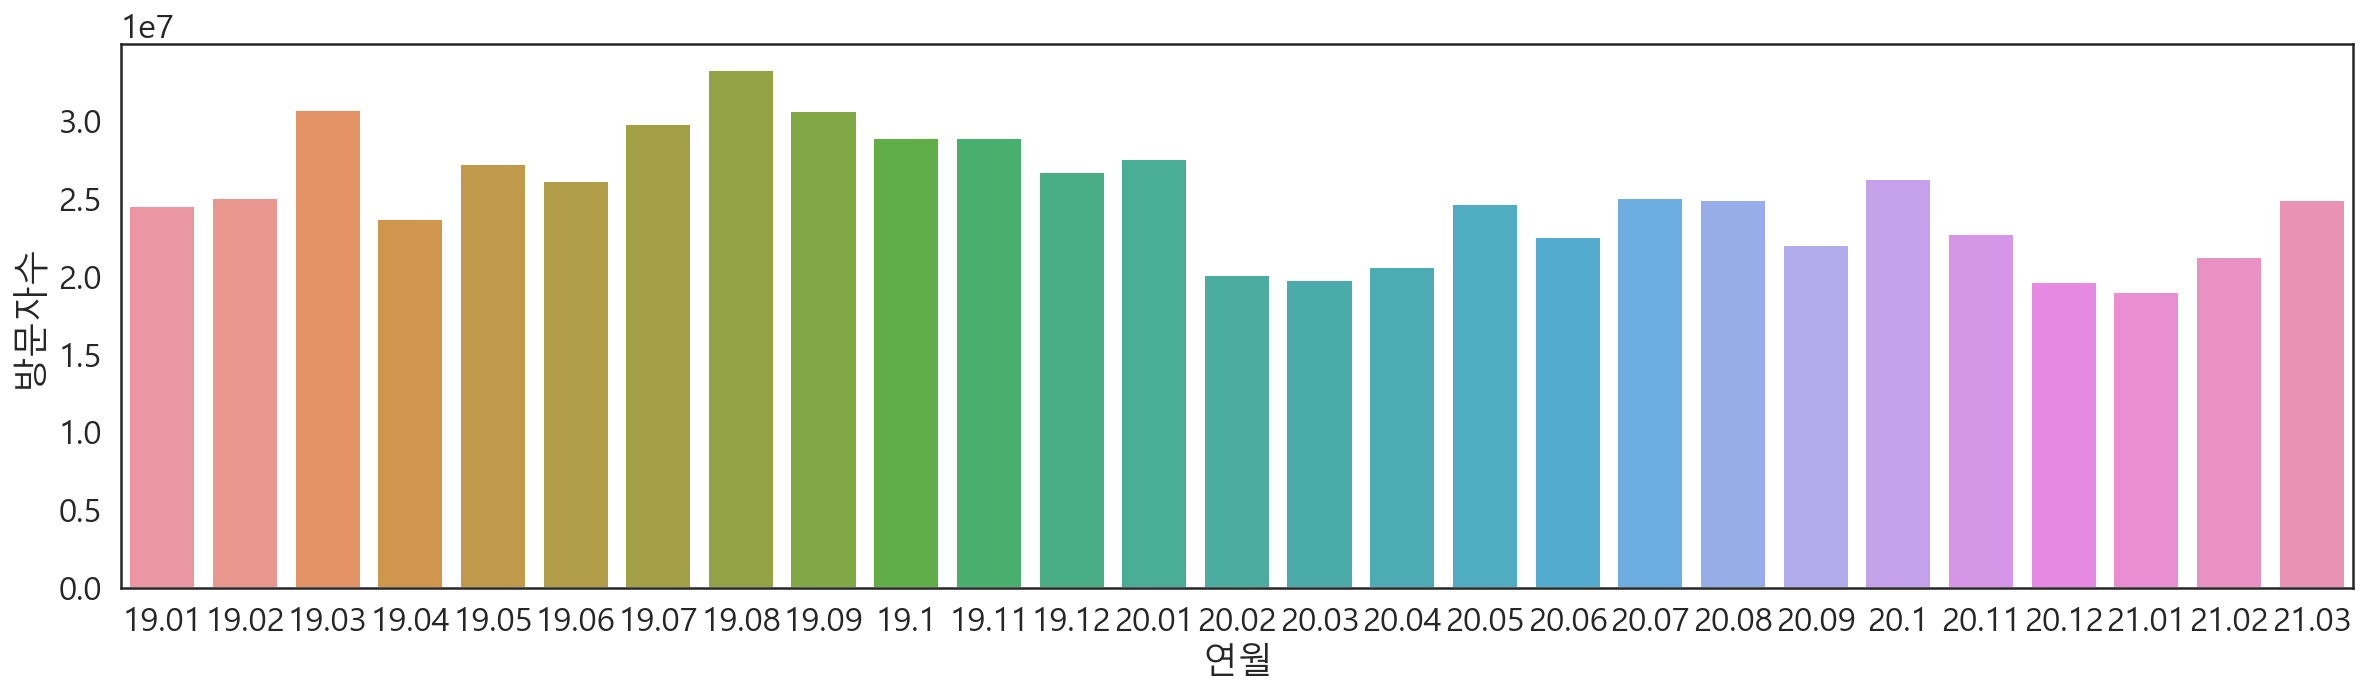

In [432]:
plt.figure(figsize=(20,5))
sns.barplot(x='연월', y='방문자수', data=df1_melt, ci=None)

In [433]:
df1_melt

,지역,구분,연월,방문자수
0,전국,외부방문자(b+c),19.01,220794539
1,서울특별시,외부방문자(b+c),19.01,51049223
2,부산광역시,외부방문자(b+c),19.01,11968743
3,대구광역시,외부방문자(b+c),19.01,8532401
4,인천광역시,외부방문자(b+c),19.01,14095384
...,...,...,...,...
481,전라북도,외부방문자(b+c),21.03,6947656
482,전라남도,외부방문자(b+c),21.03,9591466
483,경상북도,외부방문자(b+c),21.03,13542296
484,경상남도,외부방문자(b+c),21.03,12088208


In [434]:
df_melt

,지역,구분,연도,지출액
0,전국,총소비,2019,21032874873062
1,전국,숙박업,2019,596053573558
2,전국,여행업,2019,70887490856
3,전국,대중교통,2019,788158581791
4,전국,렌터카,2019,24975698325
...,...,...,...,...
361,제주특별자치도,레저스포츠,2020,29122458525
362,제주특별자치도,면세점,2020,73449820327
363,제주특별자치도,문화서비스,2020,4227393605
364,제주특별자치도,쇼핑(면세점 제외),2020,16925928261


## 3) 방문자수 및 지출액

In [435]:
df1 = pd.read_csv('data/광역지자체 방문자수_20210423.csv')
df1

,지역,구분,2019,2020
0,전국,현지인(a),"7,984,439,648","8,231,797,994"
1,전국,외지인(b),"2,948,191,358","2,467,299,655"
2,전국,외국인(c),"71,620,649","14,083,558"
3,전국,외부방문자(b+c),"3,019,812,007","2,481,383,213"
4,전국,전년외부방문자(b'+c'),"2,787,477,829","3,019,812,007"
...,...,...,...,...
103,제주특별자치도,외지인(b),"52,895,899","46,183,160"
104,제주특별자치도,외국인(c),"5,920,797","803,809"
105,제주특별자치도,외부방문자(b+c),"58,816,696","46,986,969"
106,제주특별자치도,전년외부방문자(b'+c'),"54,982,027","58,816,696"


In [436]:
df1['2019'] = df1['2019'].apply(lambda x:int(x.replace(',', '')))
df1['2020'] = df1['2020'].apply(lambda x:int(x.replace(',', '')))
df1_melt = df1.melt(id_vars=['지역', '구분'], var_name='연도', value_name='방문자수')

In [437]:
df2 = df1_melt[df1_melt['구분'].isin(['현지인(a)', '외지인(b)', '외국인(c)'])]
df3 = df2.groupby(['지역', '연도']).sum()
df3.reset_index(inplace=True)

In [438]:
df3 = df3.sort_values(by=['연도', '지역'], ignore_index=True)

In [439]:
df4 = df_melt[df_melt['구분']=='총소비']
df4 = df4.loc[:, ['지역', '연도', '지출액']]

In [440]:
df4 = df4.sort_values(by=['연도', '지역'], ignore_index=True)

In [441]:
df5 = pd.concat([df3, df4['지출액']], axis=1)
#pd.merge(df3, df4, on=['지역'])

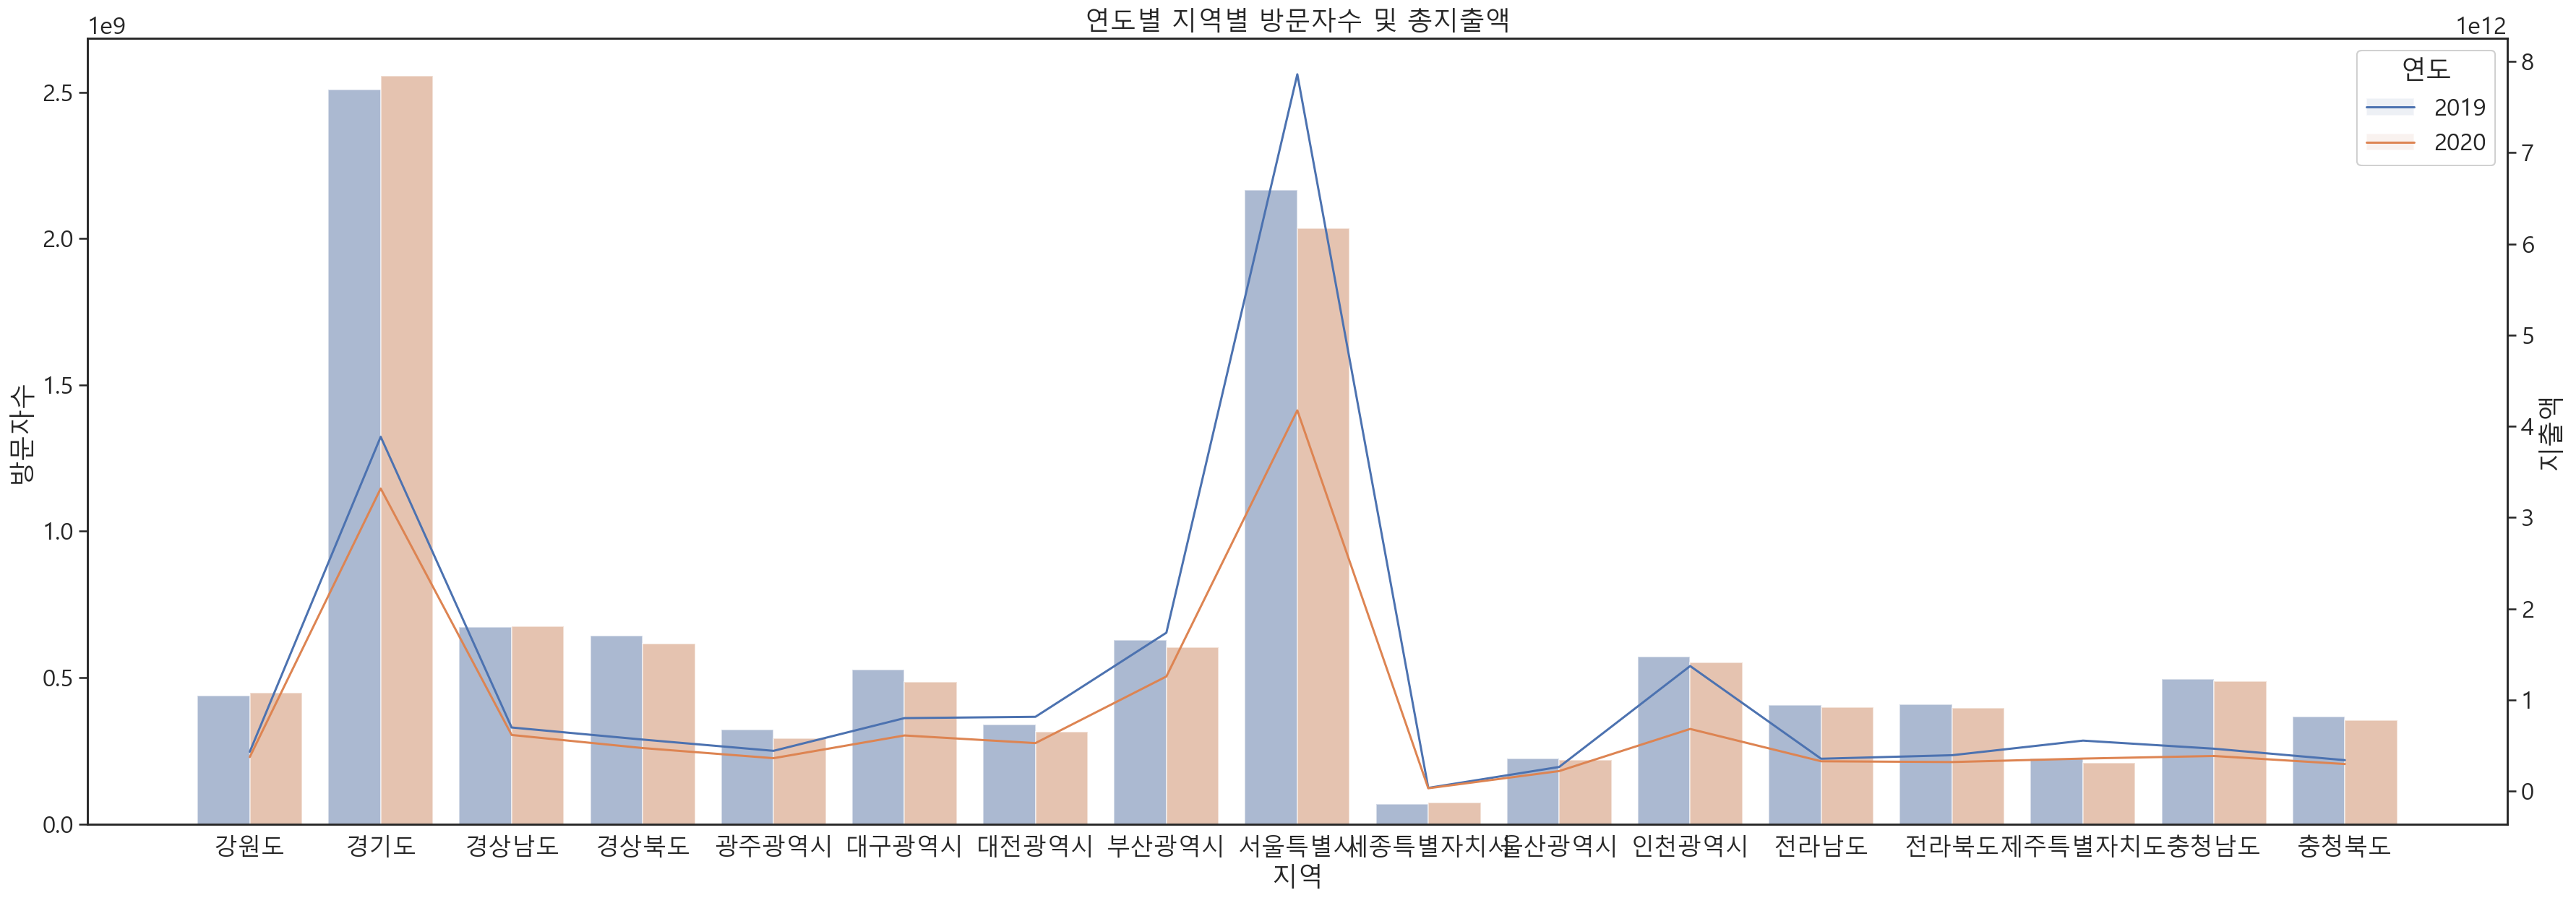

In [455]:
fig, ax1 = plt.subplots(figsize=(30,10))
ax2 = ax1.twinx()
ax1 = sns.barplot(x='지역', y='방문자수', data=df5[df5['지역']!='전국'], hue='연도', ci=None, ax=ax1, alpha=0.5)
ax2 = sns.lineplot(x='지역', y='지출액', hue='연도', data=df5[df5['지역']!='전국'], ci=None, ax=ax2)
plt.title('연도별 지역별 방문자수 및 총지출액')
plt.savefig('data2/방문자수및총지출액.jpg')

<AxesSubplot:xlabel='연도', ylabel='방문자수'>

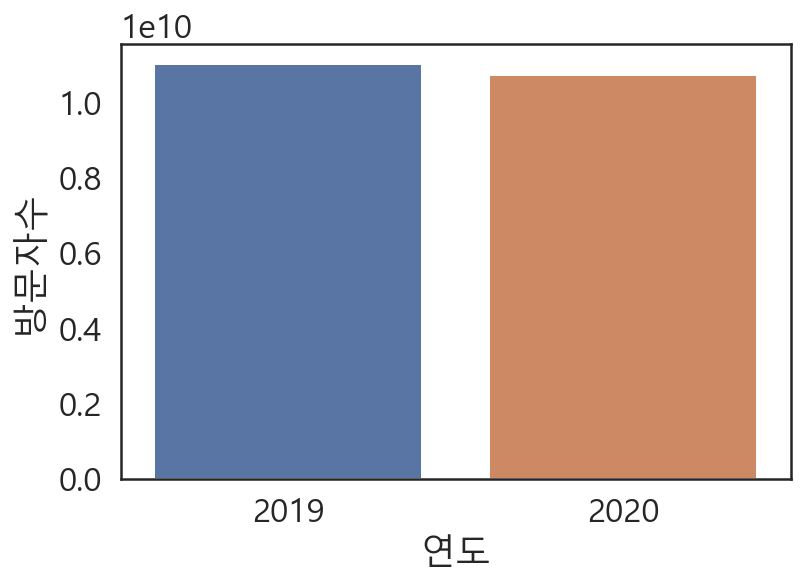

In [451]:
sns.barplot(x='연도', y='방문자수', data=df5[df5['지역']=='전국'], ci=None)

<AxesSubplot:xlabel='연도', ylabel='지출액'>

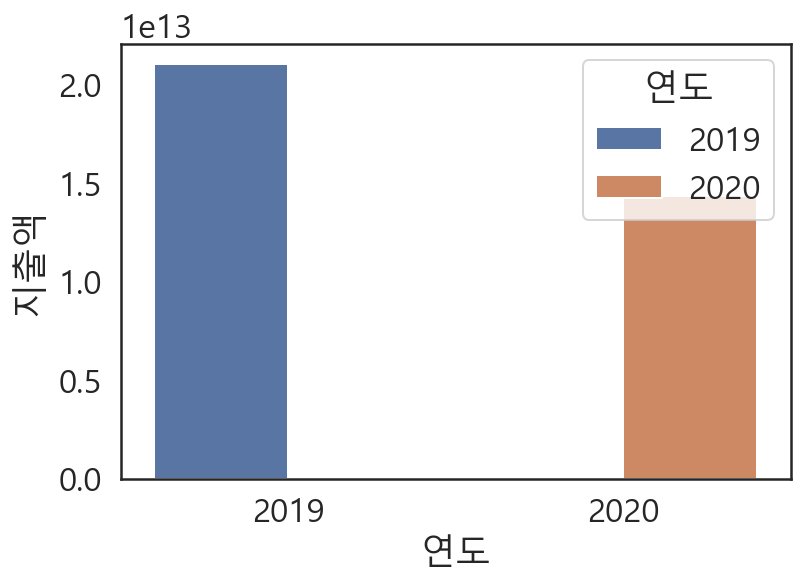

In [445]:
sns.barplot(x='연도', y='지출액', hue='연도', data=df5[df5['지역']=='전국'], ci=None)